# Lending Club Case Study

In [3]:
# importing all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
pd.set_option('display.max_columns', 50)
pd.plotting.register_matplotlib_converters()

## Data Exploration and Understanding
### Reading the datasets

In [4]:
# reading the file in python
loan = pd.read_csv('loan.csv')

### Understanding the Dataset

In [5]:
# shape
loan.shape

(39717, 111)

In [6]:
# head
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
# info
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
# describe
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

+ Fix the Missing values
+ Fix columns
+ Fix rows
+ Standardize values
+ Fix invalid values

In [9]:
# Finding the columns with missing values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [10]:
# summing up the missing values (column-wise) and displaying percentage of NaNs
print('\nPercentage of missing values column-wise:\n',round(100*(loan.isnull().sum()/len(loan.index)), 2))


Percentage of missing values column-wise:
 id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


In [11]:
# lets get the mean of missing values in each column
round(loan.isnull().mean(),2)

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
                             ... 
tax_liens                     0.0
tot_hi_cred_lim               1.0
total_bal_ex_mort             1.0
total_bc_limit                1.0
total_il_high_credit_limit    1.0
Length: 111, dtype: float64

In [12]:
# lets get number of columns where more than 80% of values are missing in that column
len(loan.columns[loan.isnull().mean() >= 0.8])

56

In [13]:
#lets drop the columns that have more than 90% values missing 
loan_columns_to_be_dropped = loan[(loan.columns[loan.isnull().mean() >= 0.8])]

In [14]:
# lets check the shape of the df again
loan_columns_to_be_dropped.shape

(39717, 56)

In [15]:
# manually analyse each column, using data dictionary which is being dropped
print('\nPercentage of missing values column-wise:\n',round(100*(loan_columns_to_be_dropped.isnull().sum()/len(loan_columns_to_be_dropped.index)), 2))


Percentage of missing values column-wise:
 mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m                      100.00
acc_open_past

In [16]:
# Finally retaining only those columns where missing values is less than 80%
loan = loan[(loan.columns[loan.isnull().mean() < 0.8])]

In [17]:
# check the shape of the resulting dataset
loan.shape
# we see that we are now left with only 55 columns out of 111

(39717, 55)

In [18]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [19]:
# lets do further analysis of missing values
print('\nPercentage of missing values column-wise:\n',round(100*(loan.isnull().sum()/len(loan.index)), 2))


Percentage of missing values column-wise:
 id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line    

In [20]:
# mths_since_last_delinq column has 64% null values
# as per data dictionary 
# mths_since_last_delinq : The number of months since the borrower's last delinquency.
# this looks to be a customer behaviour column and since more that 60% data is missing may not provide valuable insights
# Also desc column has 32% null values , it also does not provide valuable insights
# lets drop these 2 columns
loan = loan.drop(['desc','mths_since_last_delinq'], axis=1) 

In [21]:
# lets check the unique values in the dataset, 
# many columns have only one value across all the rows like application_type, policy_code

loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [22]:
# we can drop the columns [tax_liens,delinq_amnt,chargeoff_within_12_mths,acc_now_delinq , application_type ,policy_code  
# collections_12_mths_ex_med,collections_12_mths_ex_med,initial_list_status,pymnt_plan]
loan = loan.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1)

In [23]:
loan.shape

(39717, 44)

In [24]:
# lets check the remaining missing values
print('\nPercentage of missing values column-wise:')
null_data = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_data[null_data > 0]
# emp_title, title, emp_length, revol_util,last_pymnt_d, last_credit_pull_d, pub_rec_bankruptcies have null values


Percentage of missing values column-wise:


emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

In [25]:
# emp_title, title, emp_length, revol_util,last_pymnt_d, last_credit_pull_d, pub_rec_bankruptcies have null values
# as per analysis using the data dictionary
# emp_title does not have an impact on default rate
# title is the loan title , does not have impact on default rate
# last_pymnt_d is a customer behavior column
# lets drop these 3 columns
loan = loan.drop(['emp_title', 'title', 'last_pymnt_d'], axis=1)

In [26]:
# lets address the null values in the columns [emp_length,revol_util,last_credit_pull_d,pub_rec_bankruptcies]

loan=loan[~loan.pub_rec_bankruptcies.isnull()]
loan=loan[~loan.emp_length.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_credit_pull_d.isnull()]

In [27]:
# lets check the remaining missing values
print('\nPercentage of missing values column-wise:')
null_data = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_data[null_data > 0]


Percentage of missing values column-wise:


Series([], dtype: float64)

In [28]:
# lets eliminate the columns that are not required for our analysis, 
# which are customer behaviour columns as per the data disctionary
# total_rec_int, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, 
# out_prncp, out_prncp_inv, total_pymnt,total_pymnt_inv, last_pymnt_amnt
# the above columns are customer behaviour columns, they are information regarding the customer's past loan payment behaviour
# we can drop the above columns:
loan = loan.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','out_prncp', 'out_prncp_inv','total_pymnt','total_pymnt_inv', 'last_pymnt_amnt'], axis=1)

In [29]:
loan.shape

(37897, 31)

In [30]:
# there are few columns that are unique value columns and may not help in our analysis
# id, member_id, url 
# lets drop these columns
loan = loan.drop(['id', 'member_id', 'url'], axis=1)

In [31]:
# there are few columns like funded_amnt, funded_amnt_inv, 
# we can drop these columns as we will do our analysis using loan_amnt column
loan = loan.drop(['funded_amnt', 'funded_amnt_inv'], axis=1)

In [32]:
loan.shape

(37897, 26)

In [33]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,May-16,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,Sep-13,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,May-16,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,May-16,0.0


In [34]:
# lets drop column zip_code as it is not significant for our analysis
loan = loan.drop(['zip_code'], axis=1) 

In [35]:
# Lets standardize the values in the various columns

In [36]:
loan.int_rate.value_counts()

10.99%    932
13.49%    813
11.49%    800
7.51%     756
7.88%     701
         ... 
17.03%      1
24.59%      1
11.22%      1
9.83%       1
16.96%      1
Name: int_rate, Length: 337, dtype: int64

In [37]:
# remove % 
loan['int_rate'] = loan['int_rate'].apply(lambda x : float(x.split('%')[0]))

In [38]:
loan.emp_length.dtype

dtype('O')

In [39]:
loan.emp_length.value_counts()

10+ years    8759
< 1 year     4404
2 years      4299
3 years      4030
4 years      3384
5 years      3244
1 year       3142
6 years      2194
7 years      1748
8 years      1452
9 years      1241
Name: emp_length, dtype: int64

In [40]:
# remove 'years'
loan['emp_length'] = loan['emp_length'].apply(lambda x : str(x).split('year')[0])

In [41]:
loan['emp_length'].value_counts()

10+     8759
< 1     4404
2       4299
3       4030
4       3384
5       3244
1       3142
6       2194
7       1748
8       1452
9       1241
Name: emp_length, dtype: int64

In [42]:
# remove '+'
loan['emp_length'] = loan['emp_length'].apply(lambda x : str(x).split('+')[0])

In [43]:
loan['emp_length'].value_counts()

10      8759
< 1     4404
2       4299
3       4030
4       3384
5       3244
1       3142
6       2194
7       1748
8       1452
9       1241
Name: emp_length, dtype: int64

In [44]:
# remove '<'
loan['emp_length'] = loan['emp_length'].apply(lambda x : x.split('<')[1].strip() if x.find('<')!=-1 else x)

In [45]:
loan['emp_length'].value_counts()

10    8759
1     4404
2     4299
3     4030
4     3384
5     3244
1     3142
6     2194
7     1748
8     1452
9     1241
Name: emp_length, dtype: int64

In [46]:
# cast to int
loan['emp_length'] = loan['emp_length'].astype('int')

In [47]:
loan['emp_length'].dtype

dtype('int32')

In [48]:
# lets remove all the rows having loan_status == Current, not required for our analysis
loan['loan_status'].value_counts()

Fully Paid     31534
Charged Off     5265
Current         1098
Name: loan_status, dtype: int64

In [49]:
loan = loan[~(loan['loan_status'] == 'Current')]

In [50]:
loan['loan_status'].dtype

dtype('O')

In [51]:
# Lets create derived column Default Rate where all Charged-Off values as reprented as 1 
# and Fully paid values are represented as 0

In [52]:
loan['Default_Rate'] = loan['loan_status'].apply(lambda x : int(1) if x == 'Charged Off' else int(0))

In [53]:
loan['Default_Rate'].dtype

dtype('int64')

In [54]:
# Lets standardize the revol_util column
loan['revol_util'].value_counts()

0%        883
0.20%      59
63%        56
40.70%     55
61%        55
         ... 
25.33%      1
41.85%      1
29.53%      1
33.39%      1
37.63%      1
Name: revol_util, Length: 1086, dtype: int64

In [55]:
# remove '%'
loan['revol_util'] = loan['revol_util'].apply(lambda x : float(str(x).split('%')[0]))

In [56]:
loan.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,Default_Rate
0,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,May-16,0.0,0
1,2500,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,Sep-13,0.0,1
2,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,May-16,0.0,0
3,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,Apr-16,0.0,0
5,5000,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,Jan-16,0.0,0
6,7000,60 months,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0,Jul-05,1,7,0,17726,85.6,11,May-16,0.0,0
7,3000,36 months,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,CA,5.35,0,Jan-07,2,4,0,8221,87.5,4,Dec-14,0.0,0
8,5600,60 months,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,CA,5.55,0,Apr-04,2,11,0,5210,32.6,13,Aug-12,0.0,1
9,5375,60 months,12.69,121.45,B,B5,1,RENT,15000.0,Verified,Dec-11,Charged Off,other,TX,18.08,0,Sep-04,0,2,0,9279,36.5,3,Mar-13,0.0,1
10,6500,60 months,14.65,153.45,C,C3,5,OWN,72000.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,AZ,16.12,0,Jan-98,2,14,0,4032,20.6,23,Dec-15,0.0,0


In [57]:
loan['verification_status'].value_counts()

Not Verified       15553
Verified           11763
Source Verified     9483
Name: verification_status, dtype: int64

In [58]:
loan['revol_util'].value_counts()

0.00     883
0.20      59
63.00     56
40.70     55
61.00     55
        ... 
38.77      1
37.73      1
13.56      1
0.12       1
17.78      1
Name: revol_util, Length: 1086, dtype: int64

In [59]:
# remove '%'
loan['revol_util'] = loan['revol_util'].apply(lambda x : float(str(x).split('%')[0]))

In [60]:
loan['revol_util'].value_counts()

0.00     883
0.20      59
63.00     56
40.70     55
61.00     55
        ... 
38.77      1
37.73      1
13.56      1
0.12       1
17.78      1
Name: revol_util, Length: 1086, dtype: int64

In [61]:
# lets standardize the date column and create the required derived columns
loan['issue_d_month'] = pd.to_datetime(loan['issue_d'],format='%b-%y').dt.month_name()

In [62]:
loan['issue_d_year'] = pd.to_datetime(loan['issue_d'],format='%b-%y').dt.year

In [63]:
# lets do the same with earliest_cr_lines
loan['earliest_cr_line_year'] = pd.to_datetime(loan['earliest_cr_line'],format='%b-%y').dt.year

In [64]:
loan['earliest_cr_line_year'].value_counts()
# there are some values greater than 2011
# need to fix them

2000    3036
1999    2805
1998    2668
2001    2385
1997    2291
1996    2113
1995    1985
1994    1862
2002    1814
2003    1750
2004    1668
2005    1425
1993    1387
2006    1115
1992     976
1990     948
1991     894
1989     787
2007     677
1988     670
1987     565
1986     448
1985     407
1984     364
1983     303
1982     194
1981     160
1980     157
2008     144
1979     137
1978     136
1977      98
1976      74
1975      66
1974      53
1973      45
1971      38
1970      37
1972      34
1969      26
2067      15
2068      14
2066       8
2065       6
2063       4
2062       3
2064       3
2046       1
2056       1
2054       1
2050       1
Name: earliest_cr_line_year, dtype: int64

In [65]:
loan['earliest_cr_line_year'] = loan['earliest_cr_line_year'].apply(lambda x : x-100 if x > 2011 else x)


In [66]:
loan['earliest_cr_line_year'].value_counts()

2000    3036
1999    2805
1998    2668
2001    2385
1997    2291
1996    2113
1995    1985
1994    1862
2002    1814
2003    1750
2004    1668
2005    1425
1993    1387
2006    1115
1992     976
1990     948
1991     894
1989     787
2007     677
1988     670
1987     565
1986     448
1985     407
1984     364
1983     303
1982     194
1981     160
1980     157
2008     144
1979     137
1978     136
1977      98
1976      74
1975      66
1974      53
1973      45
1971      38
1970      37
1972      34
1969      26
1967      15
1968      14
1966       8
1965       6
1963       4
1964       3
1962       3
1956       1
1954       1
1950       1
1946       1
Name: earliest_cr_line_year, dtype: int64

In [67]:
# lets standardize the date column and create the required derived columns
loan['last_credit_pull_d_month'] = pd.to_datetime(loan['last_credit_pull_d'],format='%b-%y').dt.month_name()

In [68]:
loan['last_credit_pull_d_year'] = pd.to_datetime(loan['last_credit_pull_d'],format='%b-%y').dt.year

In [69]:
# lets cast pub_rec_bankruptcies to int
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].astype('int')

## Data Analysis

In [70]:
loan.head(10)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,Default_Rate,issue_d_month,issue_d_year,earliest_cr_line_year,last_credit_pull_d_month,last_credit_pull_d_year
0,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,May-16,0,0,December,2011,1985,May,2016
1,2500,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,Sep-13,0,1,December,2011,1999,September,2013
2,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,May-16,0,0,December,2011,2001,May,2016
3,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,Apr-16,0,0,December,2011,1996,April,2016
5,5000,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,Jan-16,0,0,December,2011,2004,January,2016
6,7000,60 months,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0,Jul-05,1,7,0,17726,85.6,11,May-16,0,0,December,2011,2005,May,2016
7,3000,36 months,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,CA,5.35,0,Jan-07,2,4,0,8221,87.5,4,Dec-14,0,0,December,2011,2007,December,2014
8,5600,60 months,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,CA,5.55,0,Apr-04,2,11,0,5210,32.6,13,Aug-12,0,1,December,2011,2004,August,2012
9,5375,60 months,12.69,121.45,B,B5,1,RENT,15000.0,Verified,Dec-11,Charged Off,other,TX,18.08,0,Sep-04,0,2,0,9279,36.5,3,Mar-13,0,1,December,2011,2004,March,2013
10,6500,60 months,14.65,153.45,C,C3,5,OWN,72000.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,AZ,16.12,0,Jan-98,2,14,0,4032,20.6,23,Dec-15,0,0,December,2011,1998,December,2015


In [71]:
loan.shape

(36799, 31)

## Univariate and Segmented Univariate Analysis

In [72]:
# Lets consider the Categorical columns first

# loan_status
# Term
# grade
# sub_grade
# home_ownership
# verification_status
# issue_d_month
# issue_d_year
# purpose
# addr_state
# earliest_cr_line_year
# last_credit_pull_d

In [73]:
# lets check the loan_status values
loan.loan_status.value_counts()

Fully Paid     31534
Charged Off     5265
Name: loan_status, dtype: int64

In [74]:
# lets define some utility methods to plot graphs

def count_plot(data, x):
    plot = sns.countplot(data = data, x = x)
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), size=10,
                   textcoords = 'offset points')
    
    
    
    
def bar_plot(data, x, y):
    plot = sns.barplot(data = data, x = x, y = y)
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'right', va = 'center',
                   xytext = (0, 5),  size=10,
                   textcoords = 'offset points')
        
    

## Categorical Columns

### Loan Status

Text(0.5, 1.0, 'Loan Status')

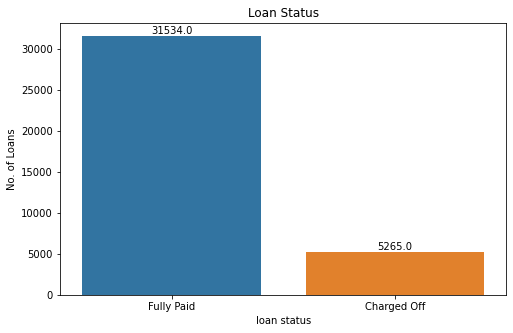

In [75]:
plt.figure(figsize=(8,5))
count_plot(loan,'loan_status')
plt.xlabel('loan status')
plt.ylabel('No. of Loans')
plt.title('Loan Status')

In [76]:
# we can find the % of defaulters
loan.Default_Rate.describe()

# about 14% of people of total borrowers have defaulted

count    36799.000000
mean         0.143075
std          0.350154
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Default_Rate, dtype: float64

### Term

In [77]:
loan.term.describe()

count          36799
unique             2
top        36 months
freq           27545
Name: term, dtype: object

Text(0.5, 1.0, 'Term vs Default Rate')

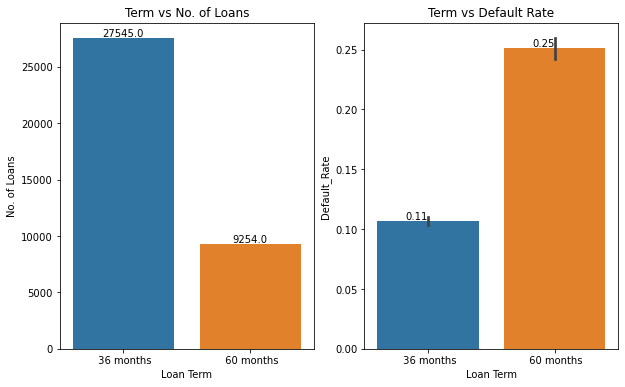

In [78]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# loan Term  Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'term')
# Add label for x axis
plt.xlabel('Loan Term')
# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Term vs No. of Loans')


plt.subplot(1,2,2)

bar_plot(loan, x='term', y='Default_Rate')
# Add label for x axis
plt.xlabel('Loan Term')

# Add title
plt.title('Term vs Default Rate')


#### Observation:
+ There are more number are loans for 36 months term <br>
+ The Default rate is higher by 20% when the loan term is 60 months

### Grade

In [79]:
loan.grade.describe()

count     36799
unique        7
top           B
freq      11148
Name: grade, dtype: object

Text(0.5, 1.0, 'Grade vs Default Rate')

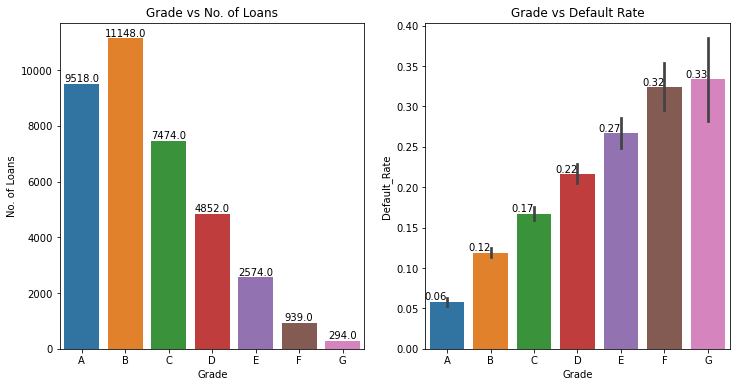

In [80]:
# Set the width and height of the figure
plt.figure(figsize=(12,6))

# Grade Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan.sort_values(['grade']), x = 'grade')
# Add label for x axis
plt.xlabel('Grade')
# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Grade vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan.sort_values(['grade']), x='grade', y='Default_Rate')
# Add label for x axis
plt.xlabel('Grade')
# Add title
plt.title('Grade vs Default Rate')

#### Observation:
+ There are more number are loans for high grades A, B and C <br>
+ The Default rate is higher for grades E, F and G

### Sub_Grade

In [81]:
loan.sub_grade.describe()

count     36799
unique       35
top          A4
freq       2762
Name: sub_grade, dtype: object

Text(0.5, 1.0, 'SubGrade vs Default Rate')

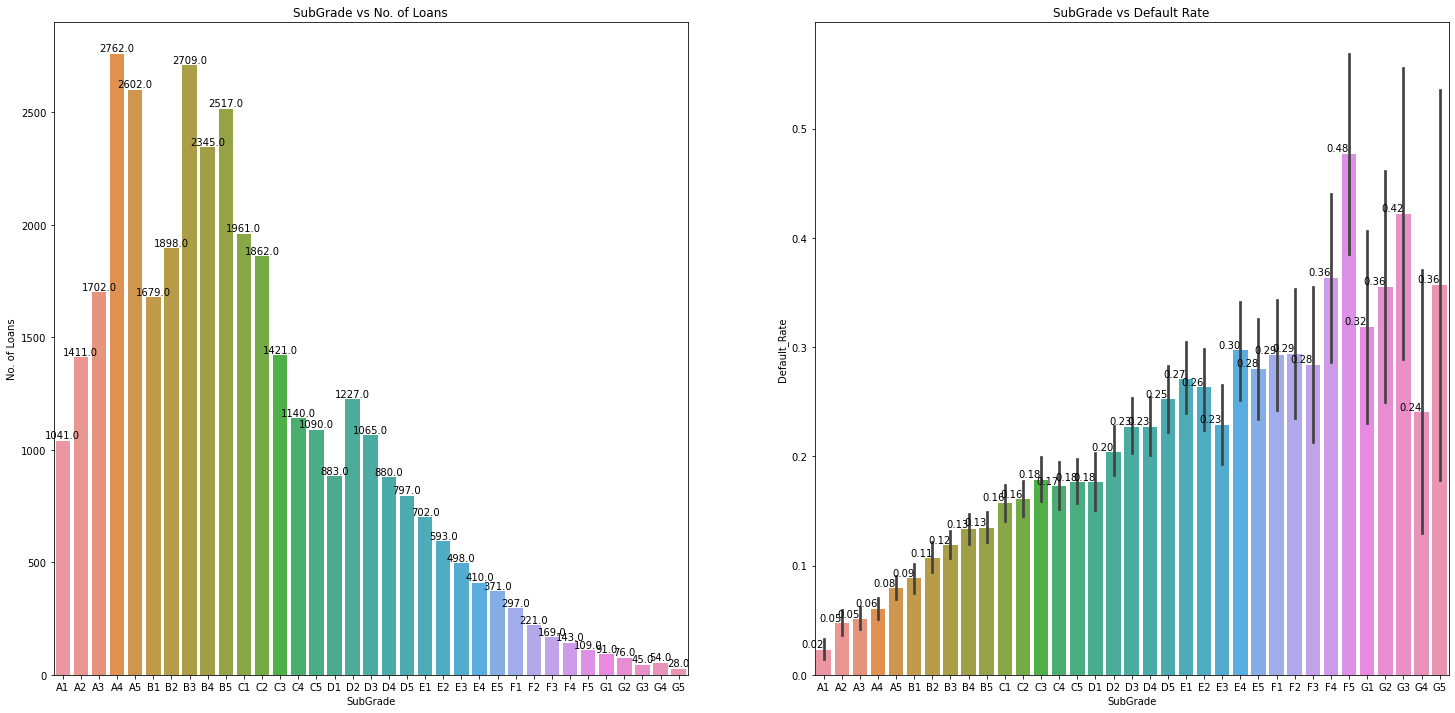

In [82]:
# Set the width and height of the figure
plt.figure(figsize=(25,12))

# Subgrade Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan.sort_values(['sub_grade']), x = 'sub_grade')
# Add label for x axis
plt.xlabel('SubGrade')
# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('SubGrade vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan.sort_values(['sub_grade']), x='sub_grade', y='Default_Rate')
# Add label for x axis
plt.xlabel('SubGrade')
# Add title
plt.title('SubGrade vs Default Rate')

#### Observation:
+ There are more number are loans for high subgrades A3-A5, B1-B5 and C1-C5 <br>
+ The Default rate is higher for the subgrades D5, E1-E5, F1-F5 and G1-G5

### Purpose of loan

In [83]:
loan.purpose.value_counts()

debt_consolidation    17373
credit_card            4799
other                  3595
home_improvement       2734
major_purchase         2055
small_business         1655
car                    1429
wedding                 893
medical                 645
moving                  541
house                   349
vacation                341
educational             296
renewable_energy         94
Name: purpose, dtype: int64

Text(0.5, 1.0, 'Purpose vs Default Rate')

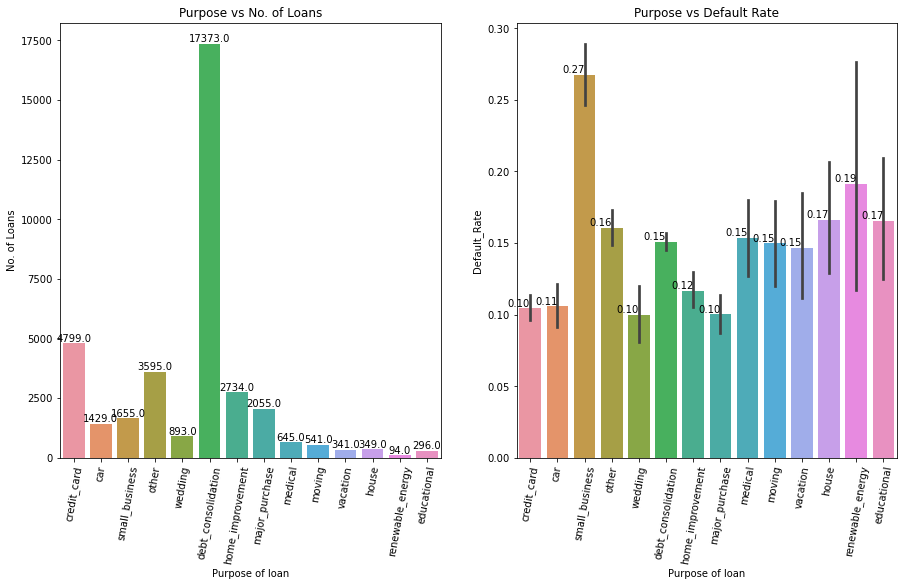

In [84]:
# Set the width and height of the figure
plt.figure(figsize=(15,8))

# Purpose Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'purpose')
# Add label for x axis
plt.xlabel('Purpose of loan')
plt.xticks(rotation = 80)
# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Purpose vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='purpose', y='Default_Rate')
# Add label for x axis
plt.xlabel('Purpose of loan')
plt.xticks(rotation = 80)
# Add title
plt.title('Purpose vs Default Rate')

#### Observation:
+ Top 5 purpose of loan are debt_consolidation, credit_card, other, home_improvement and major_purchase <br>
+ The Default rate is higher for small_business, renewable_energy , eductaional and house

### Home ownership

In [85]:
loan.home_ownership.describe()

count     36799
unique        4
top        RENT
freq      17666
Name: home_ownership, dtype: object

Text(0.5, 1.0, 'Home ownership vs Default Rate')

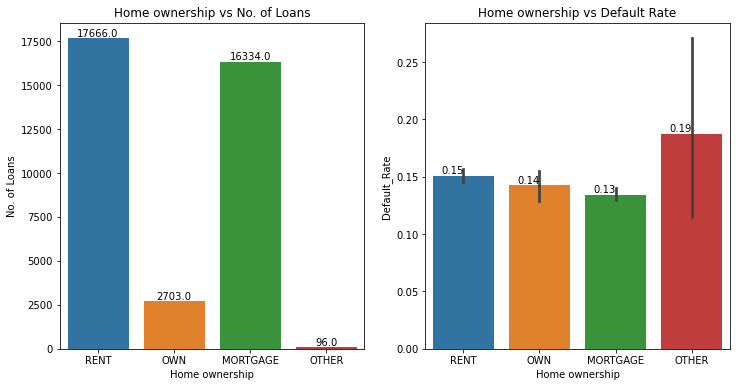

In [86]:
# Set the width and height of the figure
plt.figure(figsize=(12,6))

# Home ownwership Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'home_ownership')
# Add label for x axis
plt.xlabel('Home ownership')
# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Home ownership vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='home_ownership', y='Default_Rate')
# Add label for x axis
plt.xlabel('Home ownership')
# Add title
plt.title('Home ownership vs Default Rate')

#### Observation:
+ More loan borrowers have home ownerhip status as Rent or Mortgage <br>
+ The Default rate is highest for the people with home ownership status as Other

### Verification status

In [87]:
loan.verification_status.describe()

count            36799
unique               3
top       Not Verified
freq             15553
Name: verification_status, dtype: object

Text(0.5, 1.0, 'Verification Status vs Default Rate')

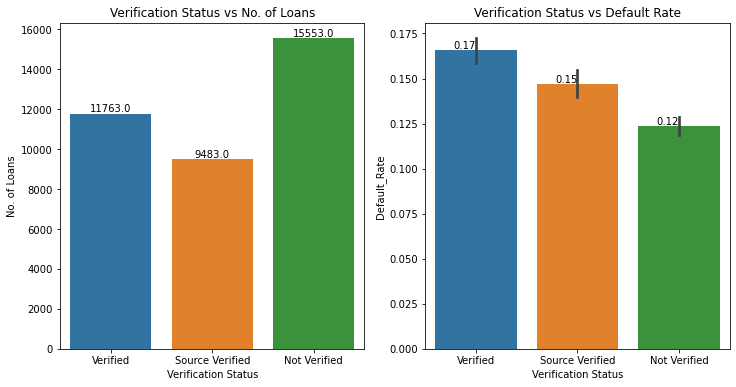

In [88]:
# Set the width and height of the figure
plt.figure(figsize=(12,6))

# Verification Status Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'verification_status')
# Add label for x axis
plt.xlabel('Verification Status')
# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Verification Status vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='verification_status', y='Default_Rate')
# Add label for x axis
plt.xlabel('Verification Status')
# Add title
plt.title('Verification Status vs Default Rate')

#### Observation:
+ Large number of loans are verified either by self or third party before approval <br>
+ But looks like verification status has no or very minimal impact on the Default Rate the diff between max and min Default Rate is very less

### Loan Issue Date 
#### Loan Issue Month 

In [89]:
loan['issue_d_month'].value_counts()

December     4033
November     3852
October      3586
September    3372
August       3284
July         3218
June         3085
May          2836
April        2754
March        2509
January      2161
February     2109
Name: issue_d_month, dtype: int64

Text(0.5, 1.0, 'Loan Issue Month vs Default Rate')

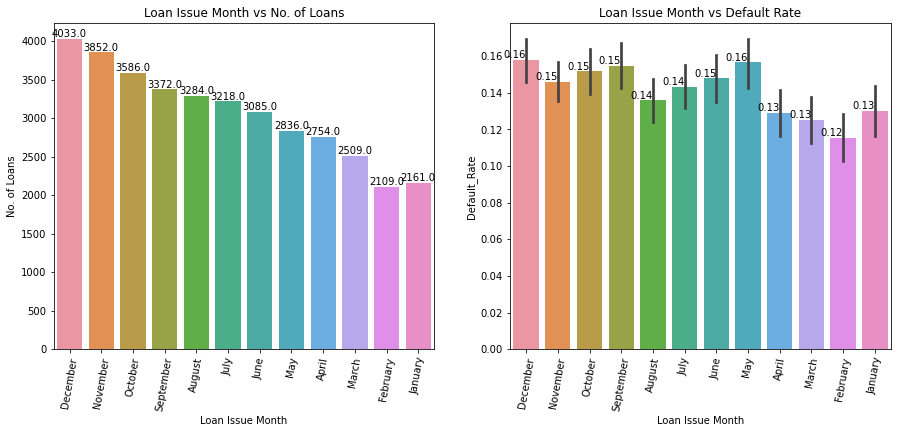

In [90]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Loan Issue Month Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'issue_d_month')
# Add label for x axis
plt.xlabel('Loan Issue Month')
plt.xticks(rotation = 80)
# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Loan Issue Month vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='issue_d_month', y='Default_Rate')
# Add label for x axis
plt.xlabel('Loan Issue Month')
plt.xticks(rotation = 80)
# Add title
plt.title('Loan Issue Month vs Default Rate')

#### Observation:
+ Large number of loans are appoved or applied in the last quarter of the year Dec, Nov and Oct <br>
+ But looks like loan issue month has no or very minimal impact on the Default Rate the lowest and highest Default Rate differ only by 4%

#### Loan Issue Year 

In [91]:
loan.issue_d_year.describe()

count    36799.000000
mean      2010.349629
std          0.815525
min       2007.000000
25%       2010.000000
50%       2011.000000
75%       2011.000000
max       2011.000000
Name: issue_d_year, dtype: float64

Text(0.5, 1.0, 'Loan Issue Year vs Default Rate')

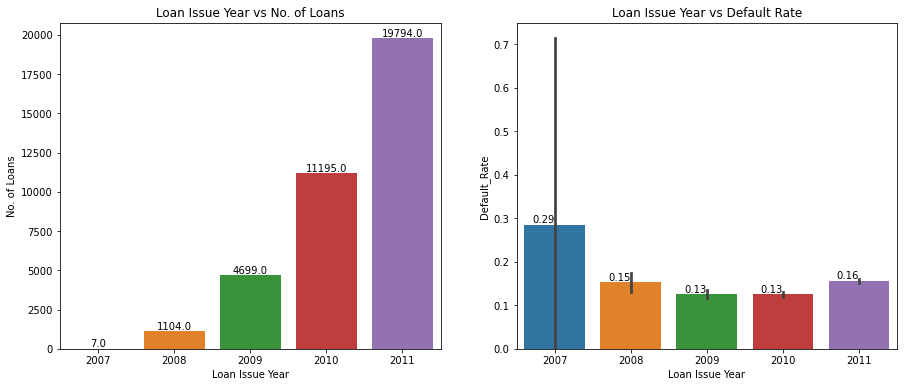

In [92]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Loan Issue Year Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'issue_d_year')
# Add label for x axis
plt.xlabel('Loan Issue Year')

# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Loan Issue Year vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='issue_d_year', y='Default_Rate')
# Add label for x axis
plt.xlabel('Loan Issue Year')

# Add title
plt.title('Loan Issue Year vs Default Rate')

#### Observation:
+ No. of loan applications have increased exponentially from 2007 to 2011 <br>
+ The Default Rate was exceptionaly high for the year 2007(may be due to global recession) also the data has very high std. dev. , otherwise looks like Loan issue year also does not have any significant impact on Default Rate

### earliest reported credit line 
#### earliest reported credit line year

In [93]:
loan.earliest_cr_line_year.value_counts()
## looks like this is historical data of the loan applicant
## Year value ranges from 1946 - 2000

2000    3036
1999    2805
1998    2668
2001    2385
1997    2291
1996    2113
1995    1985
1994    1862
2002    1814
2003    1750
2004    1668
2005    1425
1993    1387
2006    1115
1992     976
1990     948
1991     894
1989     787
2007     677
1988     670
1987     565
1986     448
1985     407
1984     364
1983     303
1982     194
1981     160
1980     157
2008     144
1979     137
1978     136
1977      98
1976      74
1975      66
1974      53
1973      45
1971      38
1970      37
1972      34
1969      26
1967      15
1968      14
1966       8
1965       6
1963       4
1964       3
1962       3
1956       1
1954       1
1950       1
1946       1
Name: earliest_cr_line_year, dtype: int64

In [94]:
# lets create bins
earliest_cr_line_year_bins = [1945,1960,1975,1990,2005]
loan['earliest_cr_line_year_bins'] = pd.cut(loan['earliest_cr_line_year'], earliest_cr_line_year_bins)

Text(0.5, 1.0, 'Earliest credit line year vs Default Rate')

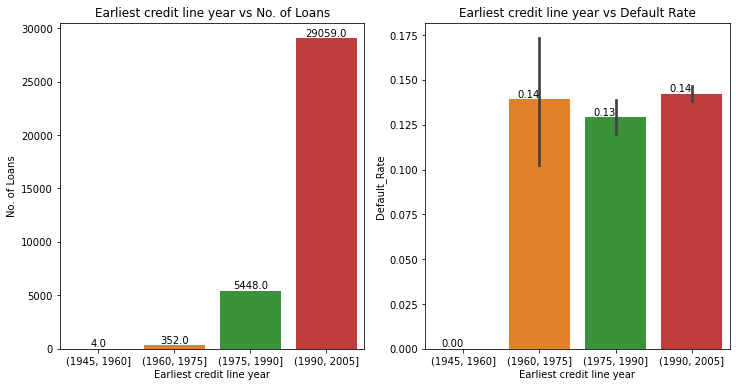

In [95]:
# Set the width and height of the figure
plt.figure(figsize=(12,6))

# Earliest credit line year Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'earliest_cr_line_year_bins')
# Add label for x axis
plt.xlabel('Earliest credit line year')

# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Earliest credit line year vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='earliest_cr_line_year_bins', y='Default_Rate')
# Add label for x axis
plt.xlabel('Earliest credit line year')

# Add title
plt.title('Earliest credit line year vs Default Rate')

#### Observation:
+ Borrowers have increased considerably over the years <br>
+ The Default Rate does not depend on this variable

### last_credit_pull_d: The most recent month LC pulled credit for this loan

In [96]:
loan['last_credit_pull_d_year'].value_counts()

2016    13736
2014     5973
2015     5303
2013     4993
2012     3939
2011     1994
2010      678
2009      155
2008       19
2007        9
Name: last_credit_pull_d_year, dtype: int64

Text(0.5, 1.0, 'Most recent credit pull vs Default Rate')

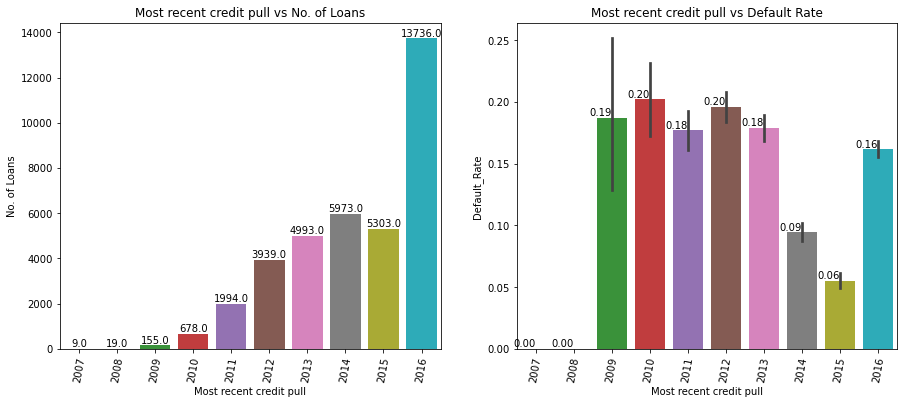

In [97]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Most recent credit pull Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'last_credit_pull_d_year')
# Add label for x axis
plt.xlabel('Most recent credit pull')
plt.xticks(rotation = 80)
# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Most recent credit pull vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='last_credit_pull_d_year', y='Default_Rate')
# Add label for x axis
plt.xlabel('Most recent credit pull')
plt.xticks(rotation = 80)
# Add title
plt.title('Most recent credit pull vs Default Rate')

#### Observation:
+ Its shows that the Lending Club is pulling credits on the loans more frequenlty in recent years. Its a LC behaviour column <br>
+ The Default Rate does not depend on this variable

### Address State

In [98]:
loan.addr_state.describe()

count     36799
unique       49
top          CA
freq       6677
Name: addr_state, dtype: object

Text(0.5, 1.0, 'Address State vs Default Rate')

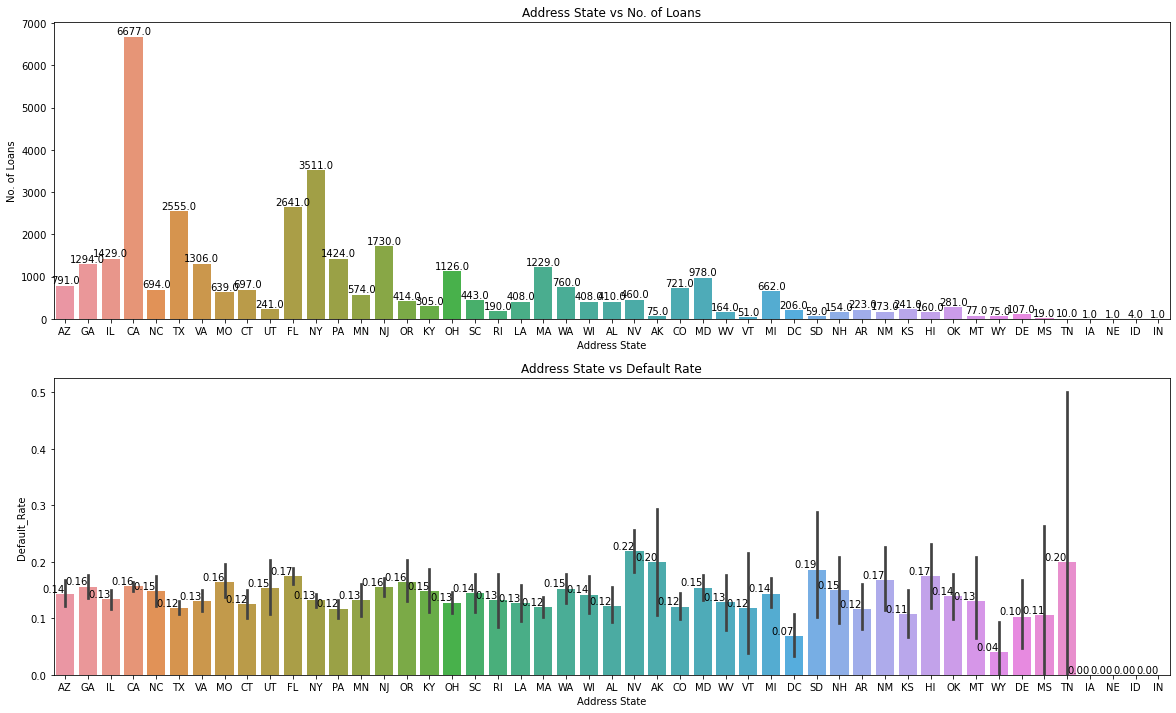

In [99]:
# Set the width and height of the figure
plt.figure(figsize=(20,12))

# Address State Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(2,1,1)
count_plot(loan, x = 'addr_state')
# Add label for x axis
plt.xlabel('Address State')
# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Address State vs No. of Loans')


plt.subplot(2,1,2)
bar_plot(loan, x='addr_state', y='Default_Rate')
# Add label for x axis
plt.xlabel('Address State')
# Add title
plt.title('Address State vs Default Rate')

#### Observation:
+ Maximum borrowers are from the states of CA(California), NY(New York), FL(Florida) <br>
+ The Default Rate is highest for the state of NV(Nevada), AK(Alaska) and TN(Tennessee)

## Numerical Columns

In [100]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,Default_Rate,issue_d_month,issue_d_year,earliest_cr_line_year,last_credit_pull_d_month,last_credit_pull_d_year,earliest_cr_line_year_bins
0,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,May-16,0,0,December,2011,1985,May,2016,"(1975, 1990]"
1,2500,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,Sep-13,0,1,December,2011,1999,September,2013,"(1990, 2005]"
2,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,May-16,0,0,December,2011,2001,May,2016,"(1990, 2005]"
3,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,Apr-16,0,0,December,2011,1996,April,2016,"(1990, 2005]"
5,5000,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,Jan-16,0,0,December,2011,2004,January,2016,"(1990, 2005]"


In [101]:
# Univariate Analysis Numerical

# loan_amnt
# int_rate
# installment
# emp_lenth
# annual_inc
# dti
# inq_last_6mths
# open_acc
# pub_rec
# revol_bal
# revol_util
# total_acc
# pub_rec_bankruptcies
# delinq_2yrs


### Interest Rate

In [102]:
loan.int_rate.describe()

count    36799.000000
mean        11.983769
std          3.701230
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [103]:
# we will have to do binning for the int_rate values to do analysis
int_rate_bins = [5, 10, 15, 20, 25]
loan['int_rate_bins'] = pd.cut(loan['int_rate'], int_rate_bins)

In [104]:
loan['int_rate_bins'].value_counts()

(10, 15]    17474
(5, 10]     11545
(15, 20]     7022
(20, 25]      758
Name: int_rate_bins, dtype: int64

Text(0.5, 1.0, 'Interest Rate vs Default Rate')

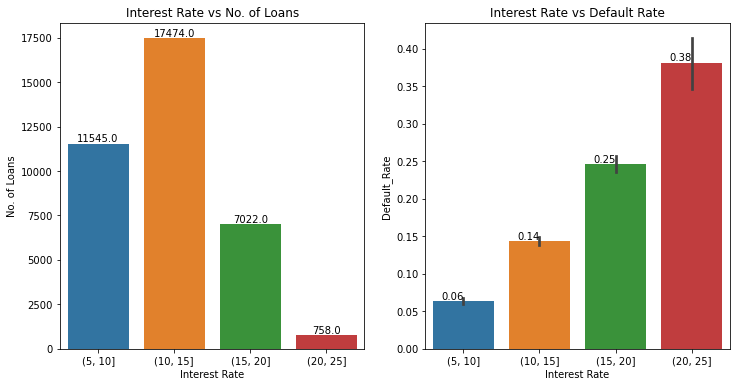

In [105]:
# Set the width and height of the figure
plt.figure(figsize=(12,6))

# Interest Rate Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'int_rate_bins')
# Add label for x axis
plt.xlabel('Interest Rate')

# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Interest Rate vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='int_rate_bins', y='Default_Rate')
# Add label for x axis
plt.xlabel('Interest Rate')

# Add title
plt.title('Interest Rate vs Default Rate')

#### Observation:
+ Maximum loans approved have interest rates ranging from 10-15% <br>
+ The Default Rate increases with the increase in the interest rate, and is highest for the range 20-25%

### Loan Amount

In [106]:
loan['loan_amnt'].describe()

count    36799.000000
mean     11149.707872
std       7369.886118
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [107]:
# lets create bins for loan amount
loan_amnt_bins = [500, 5000, 15000, 25000, 35000]
loan['loan_amnt_bins'] = pd.cut(loan['loan_amnt'], loan_amnt_bins)

Text(0.5, 1.0, 'Loan Amount vs Default Rate')

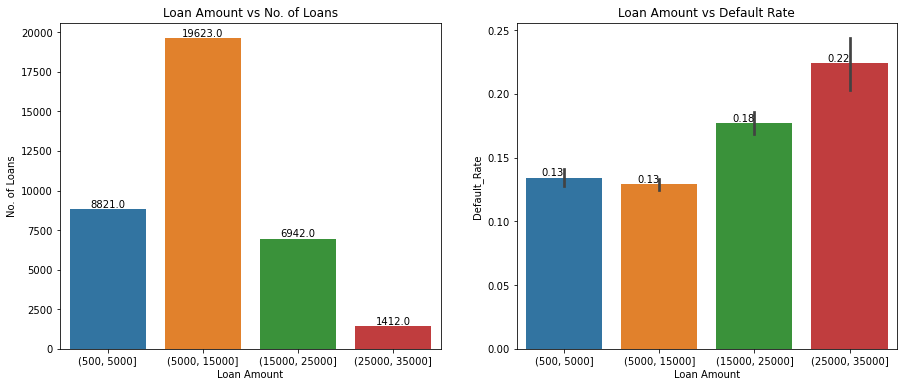

In [108]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Loan Amount Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'loan_amnt_bins')
# Add label for x axis
plt.xlabel('Loan Amount')

# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Loan Amount vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='loan_amnt_bins', y='Default_Rate')
# Add label for x axis
plt.xlabel('Loan Amount')

# Add title
plt.title('Loan Amount vs Default Rate')

#### Observation:
+ Maximum loan amounts are in range $ 5000 - $ 15000 <br>
+ The Default Rate increases with the increase in the loan amount, and is highest for the range $ 25000 - $ 35000

### Employment Length

In [109]:
loan.emp_length.describe()

count    36799.000000
mean         5.081932
std          3.399029
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [110]:
#emp_length_bins = [0, 2, 4, 6, 8, 10]
#loan['emp_length_bins'] = pd.cut(loan.emp_length, emp_length_bins)

Text(0.5, 1.0, 'Employment Length vs Default Rate')

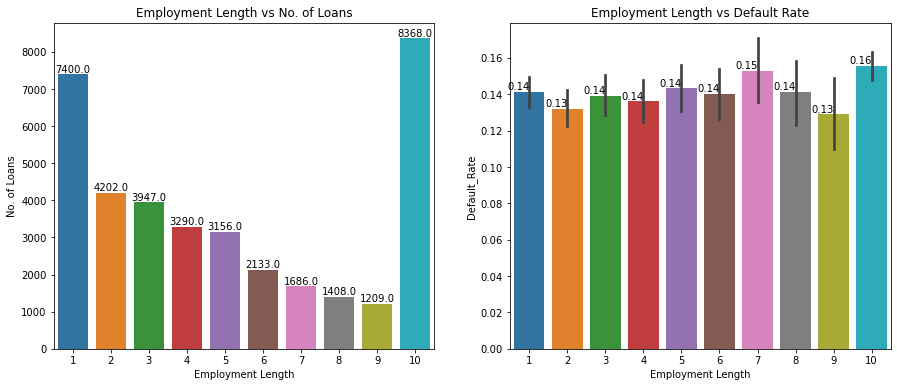

In [111]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Employment Length Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'emp_length')
# Add label for x axis
plt.xlabel('Employment Length')

# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Employment Length vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='emp_length', y='Default_Rate')
# Add label for x axis
plt.xlabel('Employment Length')

# Add title
plt.title('Employment Length vs Default Rate')

#### Observation:
+ Maximum borrowers have employment length either <= 1 year or 10+ years <br>
+ The Default Rate is highest for the people with employment length 10+ years, but the diff in max and min<br>
    Default Rate is not very high hence employment length is not of much significance 

### Annual Income

In [112]:
loan.annual_inc.describe()

count    3.679900e+04
mean     6.943376e+04
std      6.402231e+04
min      4.000000e+03
25%      4.113000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [113]:
# lets create bins for annual income values
annual_inc_bins = [4000.0, 30000.0, 60000.0, 90000.0, 6000000.0]
loan['annual_inc_bins'] = pd.cut(loan.annual_inc, annual_inc_bins)

In [114]:
loan['annual_inc_bins'].value_counts()

(30000.0, 60000.0]      15655
(60000.0, 90000.0]       9813
(90000.0, 6000000.0]     7286
(4000.0, 30000.0]        4044
Name: annual_inc_bins, dtype: int64

Text(0.5, 1.0, 'Annual Income vs Default Rate')

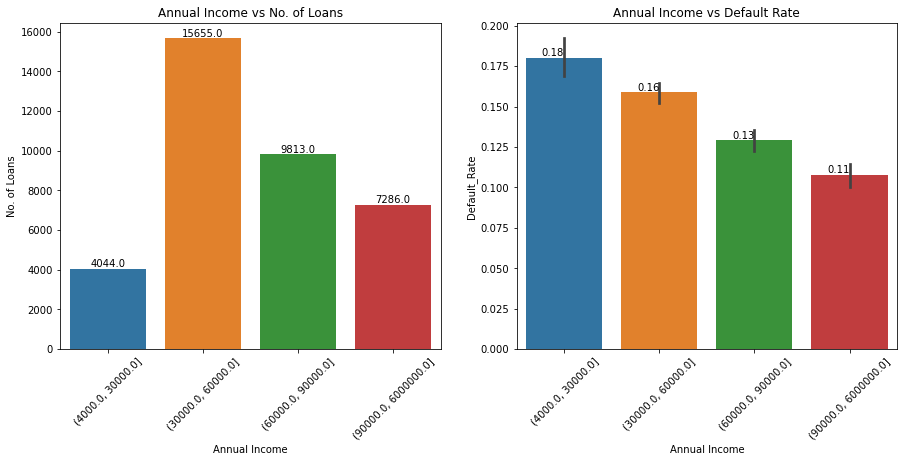

In [115]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Annual Income Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'annual_inc_bins')
# Add label for x axis
plt.xlabel('Annual Income')
plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Annual Income vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='annual_inc_bins', y='Default_Rate')
# Add label for x axis
plt.xlabel('Annual Income')
plt.xticks(rotation = 45)

# Add title
plt.title('Annual Income vs Default Rate')

#### Observation:
+ Maximum borrowers are in the annual income range of $30,000 - $60,000 <br>
+ The Default Rate is highest for low income range $4,000 - $30,000 , but the diff between max and min Default Rate is only 7%

### DTI : Debt to Income Ratio 

In [116]:
loan.dti.describe()

count    36799.000000
mean        13.334781
std          6.650068
min          0.000000
25%          8.220000
50%         13.430000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [117]:
# lets create dti bins
dti_bins = [0, 10, 20, 30]
loan['dti_bins'] = pd.cut(loan.dti, dti_bins)

Text(0.5, 1.0, 'Debt to Income vs Default Rate')

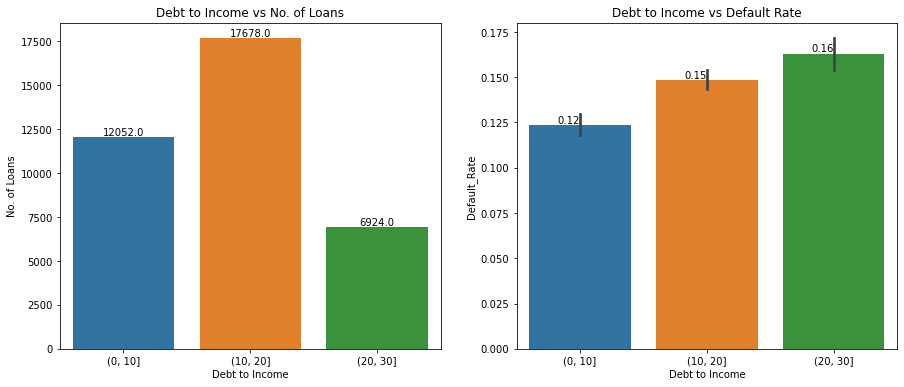

In [118]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Debt to Income Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'dti_bins')
# Add label for x axis
plt.xlabel('Debt to Income')
#plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Debt to Income vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='dti_bins', y='Default_Rate')
# Add label for x axis
plt.xlabel('Debt to Income')
#plt.xticks(rotation = 45)

# Add title
plt.title('Debt to Income vs Default Rate')

#### Observation:
+ Maximum loans are taken by borrowers having DTI range 10-10 <br>
+ The Default Rate is highest for the borrowers having a high dti , in range 20-30

### Installment

In [119]:
loan.installment.describe()

count    36799.000000
mean       324.910910
std        208.893133
min         16.080000
25%        167.730000
50%        280.130000
75%        429.380000
max       1305.190000
Name: installment, dtype: float64

In [120]:
# lets create installment bins
installment_bins = [50, 250, 500, 750,1000,1500]
loan['installment_bins'] = pd.cut(loan.installment, installment_bins)

Text(0.5, 1.0, 'Installment vs Default Rate')

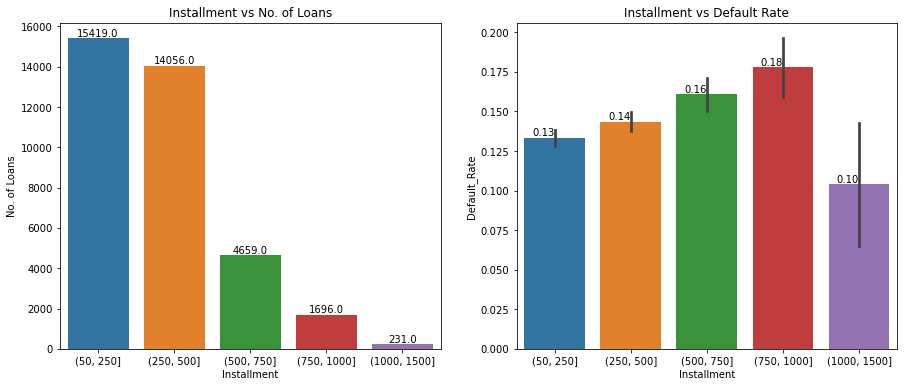

In [121]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Installment Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'installment_bins')
# Add label for x axis
plt.xlabel('Installment')
#plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Installment vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='installment_bins', y='Default_Rate')
# Add label for x axis
plt.xlabel('Installment')
#plt.xticks(rotation = 45)

# Add title
plt.title('Installment vs Default Rate')

#### Observation:
+ Maximum installments are in the range 50-250 <br>
+ The Default Rate is highest for the installment range 750-1000, but the diff between max and min Default Rate is not too high

### Inq_last_6mths : The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [122]:
loan.inq_last_6mths.describe()

count    36799.000000
mean         0.869779
std          1.068067
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

In [123]:
inq_bins = [0, 3, 6, 9]
loan['inq_bins'] = pd.cut(loan.inq_last_6mths, inq_bins)

Text(0.5, 1.0, 'No. of Inquiries vs Default Rate')

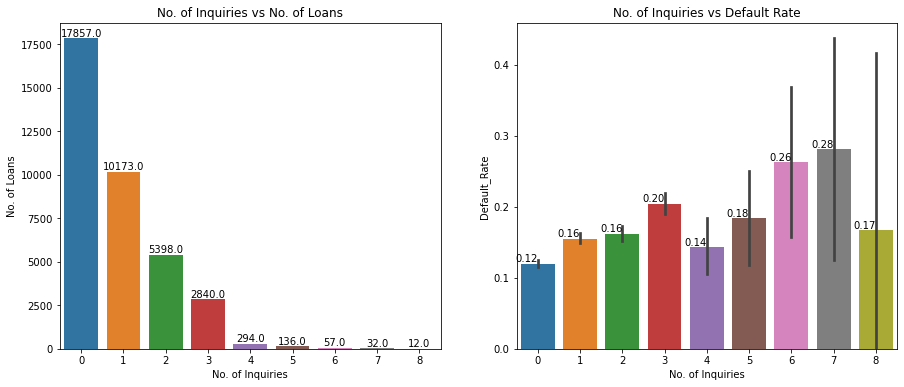

In [124]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# No. of Inquiries in 6 months Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'inq_last_6mths')
# Add label for x axis
plt.xlabel('No. of Inquiries')
#plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('No. of Inquiries vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='inq_last_6mths', y='Default_Rate')
# Add label for x axis
plt.xlabel('No. of Inquiries')
#plt.xticks(rotation = 45)

# Add title
plt.title('No. of Inquiries vs Default Rate')

#### Observation:
+ Borrowers with less inquiries have higher chance of loan approval <br>
+ The Default Rate is highest for the inquiries >= 6

### Open credit lines : The number of open credit lines in the borrower's credit file.

In [125]:
loan.open_acc.describe()

count    36799.000000
mean         9.302617
std          4.375812
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [126]:
# lets create bins for open_acc
open_acc_bins = [0, 5, 10, 15, 45]
loan['open_acc_bins'] = pd.cut(loan.open_acc, open_acc_bins)

Text(0.5, 1.0, 'Open credit lines vs Default Rate')

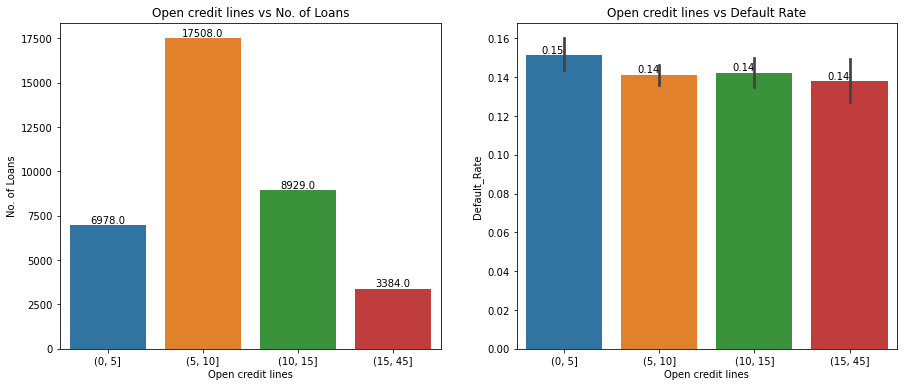

In [127]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Open credit lines Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'open_acc_bins')
# Add label for x axis
plt.xlabel('Open credit lines')
#plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Open credit lines vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='open_acc_bins', y='Default_Rate')
# Add label for x axis
plt.xlabel('Open credit lines')
#plt.xticks(rotation = 45)

# Add title
plt.title('Open credit lines vs Default Rate')

#### Observation:
+ Borrowers with lower open credit lines have higher chance of loan approval <br>
+ The Default Rate is almost similar across, open credit lines does not provide any significant insight in Default Rate

### Derogatory public records

In [128]:
loan.pub_rec.describe()

count    36799.000000
mean         0.054186
std          0.235565
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

Text(0.5, 1.0, 'Derogatory public records vs Default Rate')

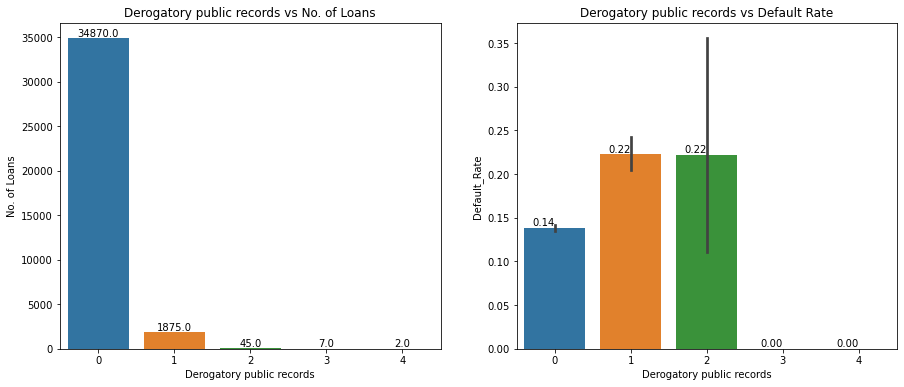

In [129]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Derogatory public records Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'pub_rec')
# Add label for x axis
plt.xlabel('Derogatory public records')
#plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Derogatory public records vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='pub_rec', y='Default_Rate')
# Add label for x axis
plt.xlabel('Derogatory public records')
#plt.xticks(rotation = 45)

# Add title
plt.title('Derogatory public records vs Default Rate')

#### Observation:
+ Borrowers with 0 derogatory public records have higher chance of loan approval <br>
+ The Default Rate is higher when borrowers have > 0 derogatory public records

### Public records of Bankruptcies

In [130]:
loan.pub_rec_bankruptcies.describe()

count    36799.000000
mean         0.041822
std          0.200862
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

Text(0.5, 1.0, 'No. of Bankruptcies vs Default Rate')

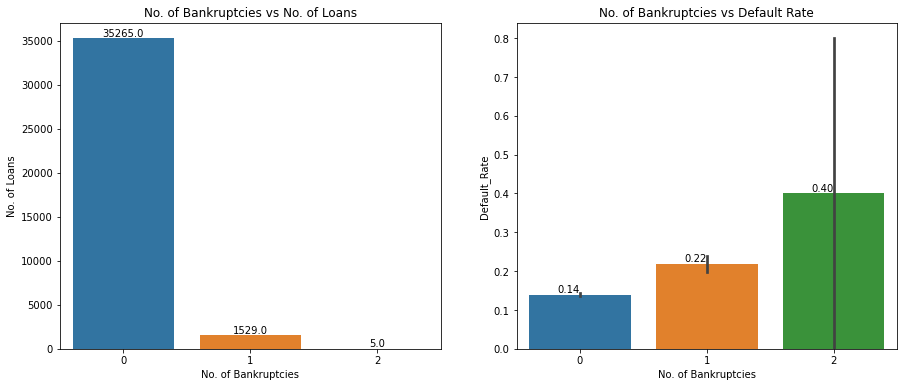

In [131]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# No. of Bankruptcies Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'pub_rec_bankruptcies')
# Add label for x axis
plt.xlabel('No. of Bankruptcies')
#plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('No. of Bankruptcies vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='pub_rec_bankruptcies', y='Default_Rate')
# Add label for x axis
plt.xlabel('No. of Bankruptcies')
#plt.xticks(rotation = 45)

# Add title
plt.title('No. of Bankruptcies vs Default Rate')

#### Observation:
+ Borrowers with 0 Public records of Bankruptcies have higher chance of loan approval <br>
+ The Default Rate is higher when borrowers have > 1 Public records of Bankruptcies

### Revolving line utilization rate

In [132]:
loan.revol_util.describe()

count    36799.000000
mean        48.991971
std         28.313114
min          0.000000
25%         25.600000
50%         49.500000
75%         72.500000
max         99.900000
Name: revol_util, dtype: float64

In [133]:
# lets create bins for revol_util
revol_util_bins = [0, 20, 40, 60, 80, 100]
loan['revol_util_bins'] = pd.cut(loan.revol_util, revol_util_bins)

Text(0.5, 1.0, 'Revolving line utilization rate vs Default Rate')

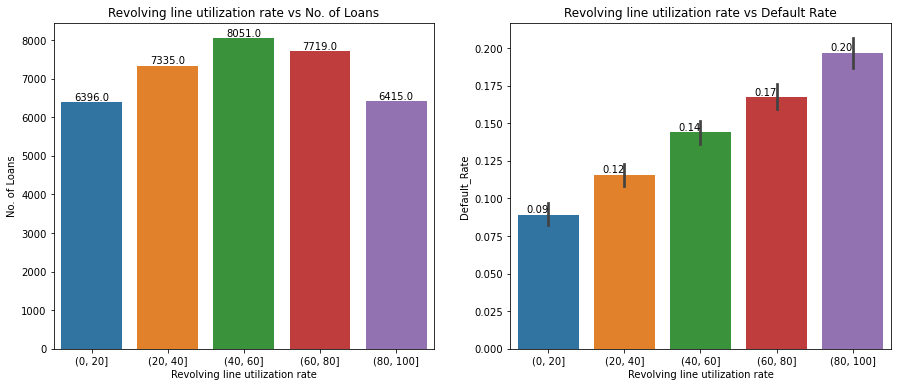

In [134]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Revolving line utilization rate Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'revol_util_bins')
# Add label for x axis
plt.xlabel('Revolving line utilization rate')
#plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Revolving line utilization rate vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='revol_util_bins', y='Default_Rate')
# Add label for x axis
plt.xlabel('Revolving line utilization rate')
#plt.xticks(rotation = 45)

# Add title
plt.title('Revolving line utilization rate vs Default Rate')

#### Observation:
+ More loans are taken by people who have around 50%  Revolving line utilization rate <br>
+ The Default Rate is higher when people have higher Revolving line utilization rate

### Total credit revolving balance

In [135]:
loan.revol_bal.describe()

count     36799.000000
mean      13373.940189
std       15848.746654
min           0.000000
25%        3728.500000
50%        8868.000000
75%       17028.000000
max      149588.000000
Name: revol_bal, dtype: float64

In [136]:
# lets create bins
revol_bal_bins = [0.0, 50000.0, 100000.0, 150000.0]
loan['revol_bal_bins'] = pd.cut(loan.revol_bal, revol_bal_bins)

Text(0.5, 1.0, 'Total credit revolving balance vs Default Rate')

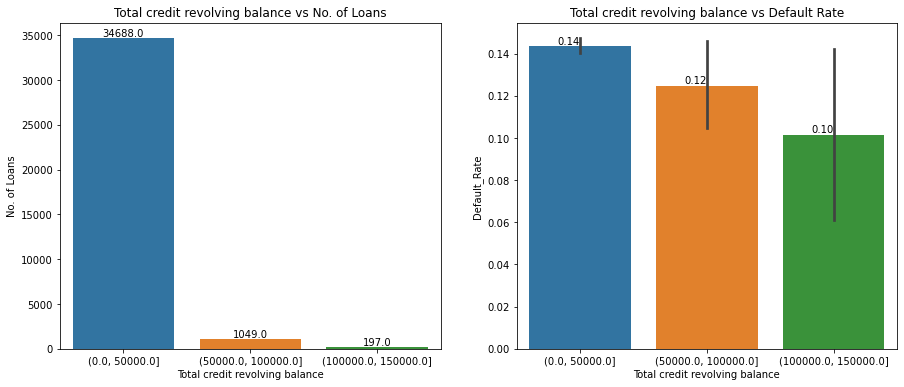

In [137]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Total credit revolving balance Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'revol_bal_bins')
# Add label for x axis
plt.xlabel('Total credit revolving balance')
#plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Total credit revolving balance vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='revol_bal_bins', y='Default_Rate')
# Add label for x axis
plt.xlabel('Total credit revolving balance')
#plt.xticks(rotation = 45)

# Add title
plt.title('Total credit revolving balance vs Default Rate')

#### Observation:
+ More loans are taken by people who have less Total credit revolving balance <br>
+ The Default Rate is higher when people have less Total credit revolving balance, but the diff of max and min Default rate is very less

### Total credit lines

In [138]:
loan.total_acc.describe()

count    36799.000000
mean        22.152477
std         11.407746
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [139]:
# lets create bins
total_acc_bins = [0,20,40,60,80,100]
loan['total_acc_bins'] = pd.cut(loan.total_acc, total_acc_bins)

Text(0.5, 1.0, 'Total credit lines vs Default Rate')

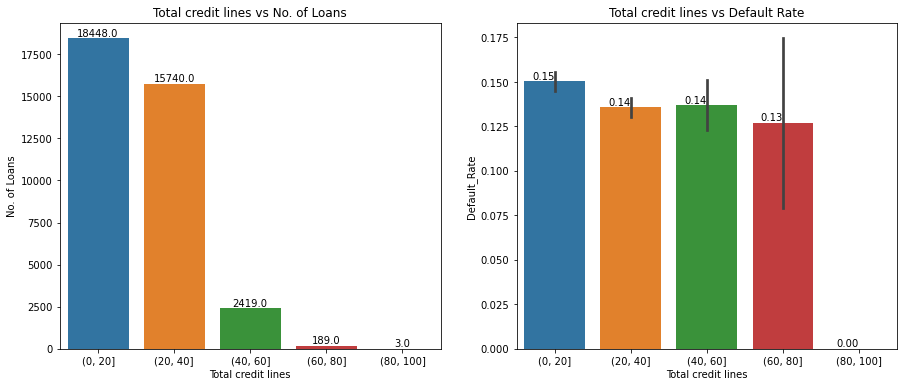

In [140]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Total credit lines Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'total_acc_bins')
# Add label for x axis
plt.xlabel('Total credit lines')
#plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('Total credit lines vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='total_acc_bins', y='Default_Rate')
# Add label for x axis
plt.xlabel('Total credit lines')
#plt.xticks(rotation = 45)

# Add title
plt.title('Total credit lines vs Default Rate')

#### Observation:
+ More loans are taken by people who have less Total credit lines <br>
+ The Default Rate is higher when people have less Total credit lines, but the diff of max and min Default rate is very less

### No. of delinquencies

In [141]:
loan.delinq_2yrs.describe()

count    36799.000000
mean         0.146145
std          0.491850
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [142]:
loan.delinq_2yrs.value_counts()

0     32809
1      3063
2       634
3       198
4        56
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

In [143]:
# lets create bins
total_acc_bins = [0,20,40,60,80,100]
loan['total_acc_bins'] = pd.cut(loan.total_acc, total_acc_bins)

Text(0.5, 1.0, 'No. of delinquencies vs Default Rate')

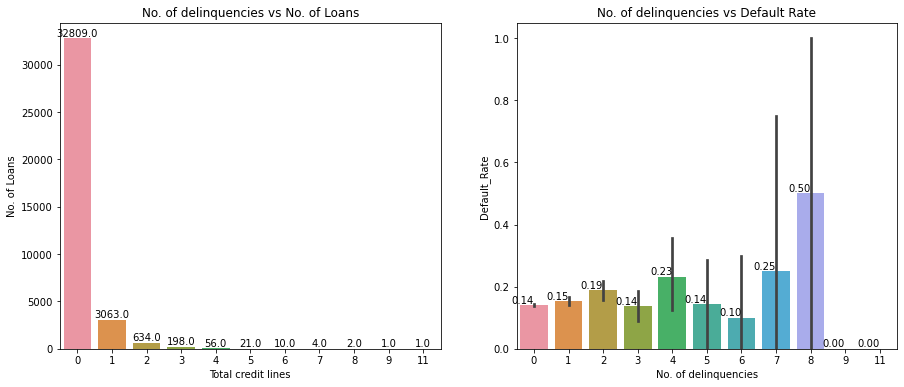

In [144]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# No. of delinquencies Analysis using count plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
count_plot(loan, x = 'delinq_2yrs')
# Add label for x axis
plt.xlabel('Total credit lines')
#plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel('No. of Loans')
# Add title
plt.title('No. of delinquencies vs No. of Loans')


plt.subplot(1,2,2)
bar_plot(loan, x='delinq_2yrs', y='Default_Rate')
# Add label for x axis
plt.xlabel('No. of delinquencies')
#plt.xticks(rotation = 45)

# Add title
plt.title('No. of delinquencies vs Default Rate')

#### Observation:
+ Borrowers who have 0 records of delinquencies have higher chances of loan approval  <br>
+ The Default Rate is higher when people have more no. of delinquencies

## Bivariate Analysis

In [145]:
# lets define some utility methods for bivariate plots

def box_plot(data, x, y):
    plot = sns.boxplot(data = data, x = x, y = y)
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), size=10,
                   textcoords = 'offset points')
    
    
    
    
def bar_plot_bivariate(data,hue, x, y):
    plot = sns.barplot(data = data, hue = hue , x = x, y = y, palette = 'bright')
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'right', va = 'center',
                   xytext = (0, 5),  size=10,
                   textcoords = 'offset points')
        
    

### Term and Grade

Text(0.5, 1.0, 'Term & Grade vs Default Rate')

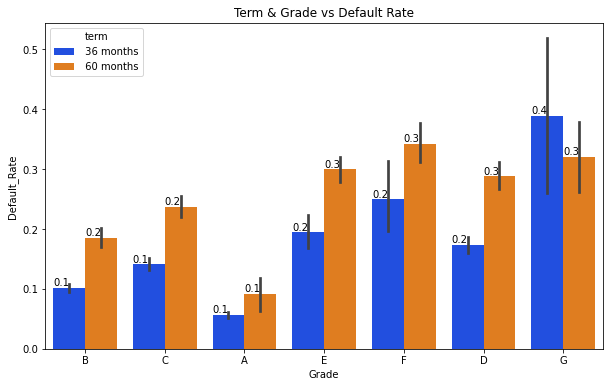

In [146]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Term and Grade Analysis bar plot w.r.t Default Rate

bar_plot_bivariate(loan, hue = 'term', x='grade', y='Default_Rate')
# Add label for x axis
plt.xlabel('Grade')
#plt.xticks(rotation = 45)

# Add title
plt.title('Term & Grade vs Default Rate')

#### Observation:
+ The Default Rate is higher for 60 months term in across all grades
+ Grade G has high risk of default

### Term and Purpose

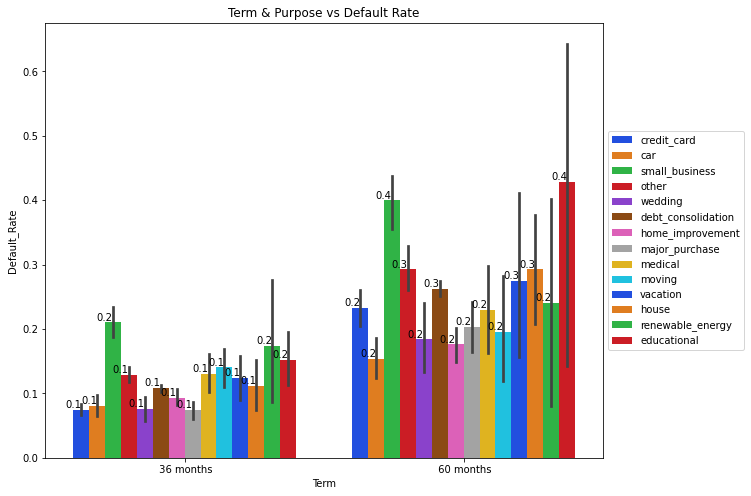

In [147]:
# Set the width and height of the figure
plt.figure(figsize=(10,8))

# Term and Grade Analysis bar plot w.r.t Default Rate

bar_plot_bivariate(loan, hue = 'purpose', x='term', y='Default_Rate')
# Add label for x axis
plt.xlabel('Term')
#plt.xticks(rotation = 45)

# Add title
plt.title('Term & Purpose vs Default Rate')
#legend placement
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### Observation:
+ The Default Rate is higher small business, renewable energy and educational across both terms

### Grade and Home ownership

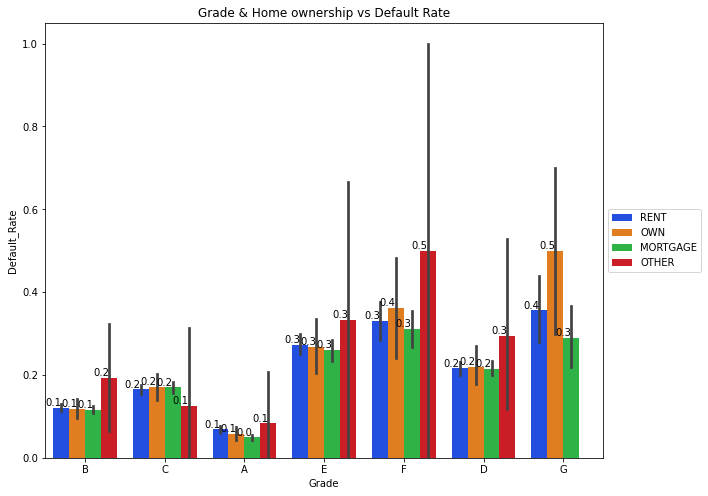

In [148]:
# Set the width and height of the figure
plt.figure(figsize=(10,8))

# Grade and Home ownership Analysis bar plot w.r.t Default Rate

bar_plot_bivariate(loan, hue = 'home_ownership', x='grade', y='Default_Rate')
# Add label for x axis
plt.xlabel('Grade')
#plt.xticks(rotation = 45)

# Add title
plt.title('Grade & Home ownership vs Default Rate')
#legend placement
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### Observation:
+ The Default Rate is higher where the home ownership status is other

### Term and Loan Issue Month

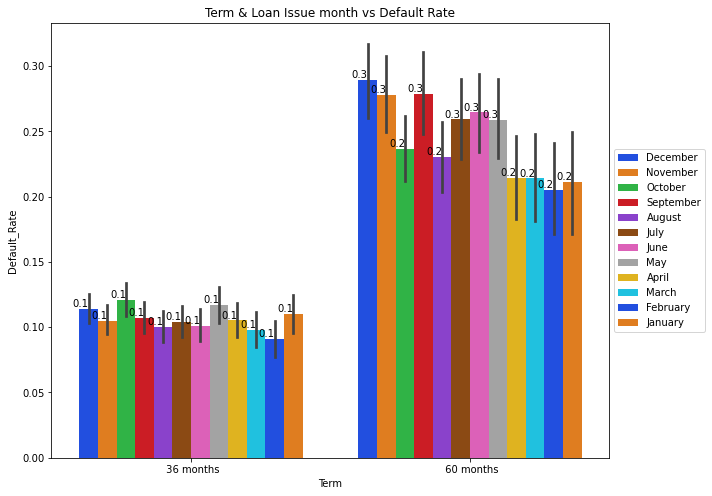

In [149]:
# Set the width and height of the figure
plt.figure(figsize=(10,8))

# Term and Loan Issue Month Analysis bar plot w.r.t Default Rate

bar_plot_bivariate(loan, hue = 'issue_d_month', x='term', y='Default_Rate')
# Add label for x axis
plt.xlabel('Term')
#plt.xticks(rotation = 45)

# Add title
plt.title('Term & Loan Issue month vs Default Rate')
#legend placement
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### Observation:
+ The Default Rate across all months is higher for 60 months term, but more higher for year end, Nov and Dec

### Grade and Purpose

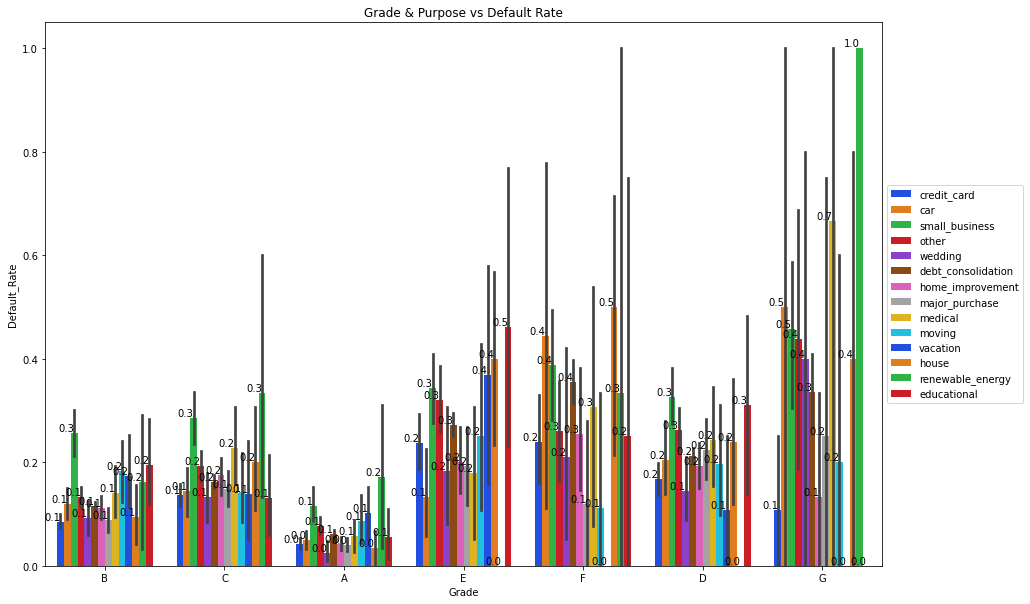

In [150]:
# Set the width and height of the figure
plt.figure(figsize=(15,10))

# Grade and Purpose Analysis bar plot w.r.t Default Rate

bar_plot_bivariate(loan, hue = 'purpose', x='grade', y='Default_Rate')
# Add label for x axis
plt.xlabel('Grade')
#plt.xticks(rotation = 45)

# Add title
plt.title('Grade & Purpose vs Default Rate')
#legend placement
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### Observation:
+ The Default Rate is higher for Small business and renewable energy purpose across all grades

In [151]:
# top 5 purpose in wrt default rate
print('Top 5 loan purpose')
loan.groupby('purpose')['Default_Rate'].mean().sort_values(ascending = False)

Top 5 loan purpose


purpose
small_business        0.267674
renewable_energy      0.191489
house                 0.166189
educational           0.165541
other                 0.160779
medical               0.153488
debt_consolidation    0.150981
moving                0.149723
vacation              0.146628
home_improvement      0.116679
car                   0.105668
credit_card           0.104397
major_purchase        0.100243
wedding               0.099664
Name: Default_Rate, dtype: float64

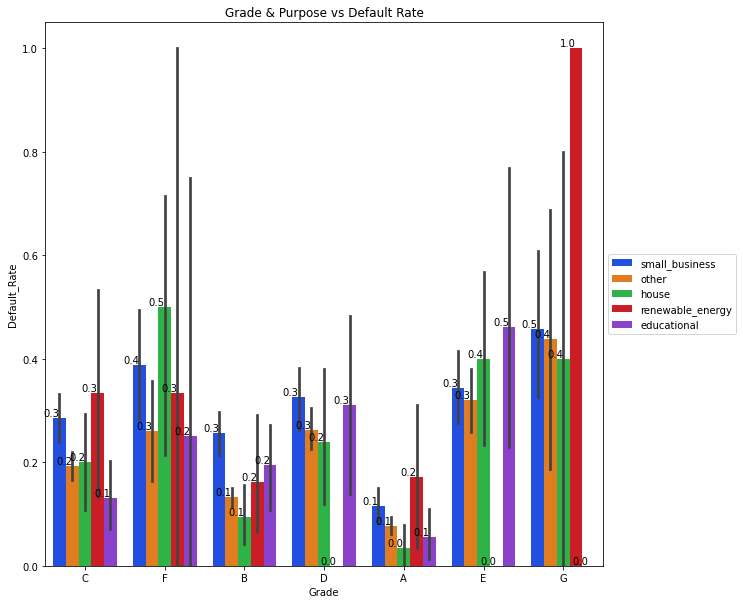

In [152]:
# the top 5 purposes wrt default rate are ['small_business',renewable_energy,house,educational,other]

# lets filter our loan df based on these 5 purpose values an plot a bar plot

top5_purpose = loan[loan['purpose'].isin(['small_business','renewable_energy','educational','other','house'])]

# Set the width and height of the figure
plt.figure(figsize=(10,10))

# Grade and Purpose Analysis bar plot w.r.t Default Rate

bar_plot_bivariate(top5_purpose, hue = 'purpose', x='grade', y='Default_Rate')
# Add label for x axis
plt.xlabel('Grade')
#plt.xticks(rotation = 45)

# Add title
plt.title('Grade & Purpose vs Default Rate')
#legend placement
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### Observation: After filtering based on top 5 defaulting purposes
+ The Default Rate is higher for Small business and renewable energy across all grades

### Term and Interest Rate

Text(0.5, 1.0, 'Term & Interest Rate vs Default Rate')

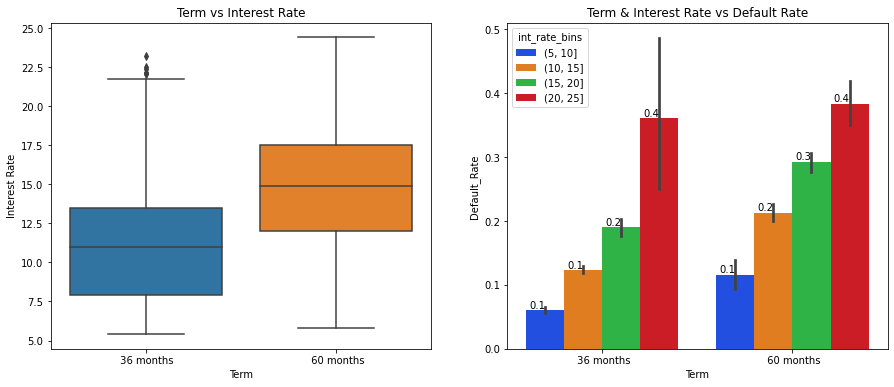

In [153]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Term vs Interest Rate Analysis using box plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
box_plot(loan, x = 'term', y='int_rate')
# Add label for x axis
plt.xlabel('Term')
#plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel('Interest Rate')
# Add title
plt.title('Term vs Interest Rate')


plt.subplot(1,2,2)
bar_plot_bivariate(loan, hue = 'int_rate_bins', x='term', y='Default_Rate')
# Add label for x axis
plt.xlabel('Term')
#plt.xticks(rotation = 45)

# Add title
plt.title('Term & Interest Rate vs Default Rate')


#### Observation:
+ The Default Rate is high for high interest rates irrespective of the term

### Loan Amount with Grade

Text(0.5, 1.0, 'Loan Amount & Grade vs Default Rate')

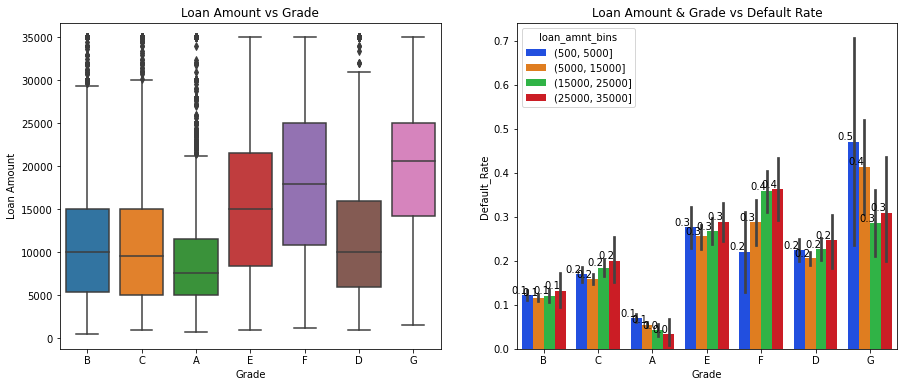

In [154]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Loan Amount vs Grade Analysis using box plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
box_plot(loan, x = 'grade', y='loan_amnt')
# Add label for x axis
plt.xlabel('Grade')
#plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel('Loan Amount')
# Add title
plt.title('Loan Amount vs Grade')


plt.subplot(1,2,2)
bar_plot_bivariate(loan, hue = 'loan_amnt_bins', x='grade', y='Default_Rate')
# Add label for x axis
plt.xlabel('Grade')
#plt.xticks(rotation = 45)

# Add title
plt.title('Loan Amount & Grade vs Default Rate')

#### Observation:
+ The Default Rate seems to be high for smaller loan amounts

### Term and DTI

Text(0.5, 1.0, 'Term & DTI vs Default Rate')

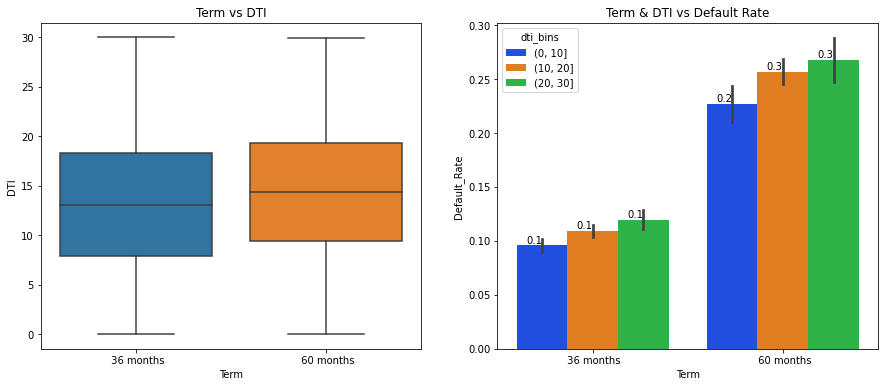

In [155]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Term and DTI Analysis using box plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
box_plot(loan, x = 'term', y='dti')
# Add label for x axis
plt.xlabel('Term')
#plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel('DTI')
# Add title
plt.title('Term vs DTI')


plt.subplot(1,2,2)
bar_plot_bivariate(loan, hue = 'dti_bins', x='term', y='Default_Rate')
# Add label for x axis
plt.xlabel('Term')
#plt.xticks(rotation = 45)

# Add title
plt.title('Term & DTI vs Default Rate')

#### Observation:
+ The Default Rate is high for high DTI 

### Grade and Derogatory Public Records

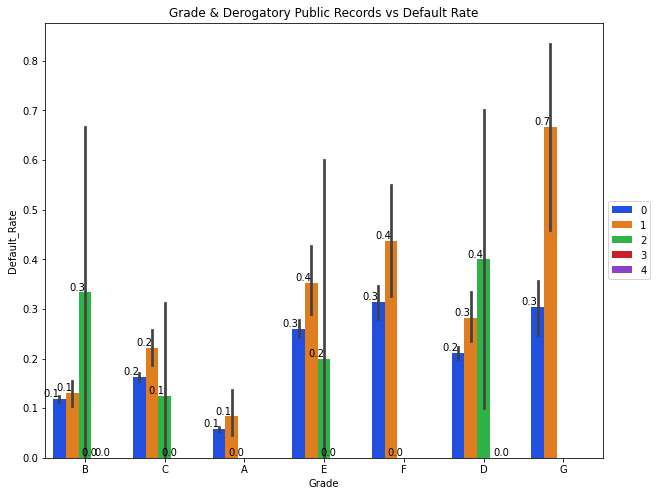

In [156]:
# Grade and pub_rec

# Set the width and height of the figure
plt.figure(figsize=(10,8))

# Grade and Derogatory Public Records Analysis using box plot and bar plot w.r.t Default Rate
bar_plot_bivariate(loan, hue = 'pub_rec', x='grade', y='Default_Rate')
# Add label for x axis
plt.xlabel('Grade')
#plt.xticks(rotation = 45)

# Add title
plt.title('Grade & Derogatory Public Records vs Default Rate')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### Observation:
+ The Default Rate is high for borrowers having >= 1 derogatory public records

### Grade and Bankruptcies

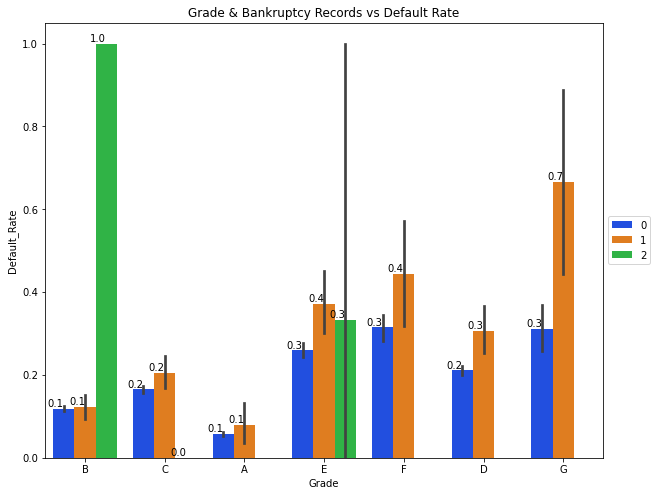

In [157]:
# Set the width and height of the figure
plt.figure(figsize=(10,8))

# Grade and Bankruptcy Records Analysis using box plot and bar plot w.r.t Default Rate
bar_plot_bivariate(loan, hue = 'pub_rec_bankruptcies', x='grade', y='Default_Rate')
# Add label for x axis
plt.xlabel('Grade')
#plt.xticks(rotation = 45)

# Add title
plt.title('Grade & Bankruptcy Records vs Default Rate')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### Observation:
+ The Default Rate is high for borrowers having >= 1 bankruptcies

### Grade and Inquiries in 6 months

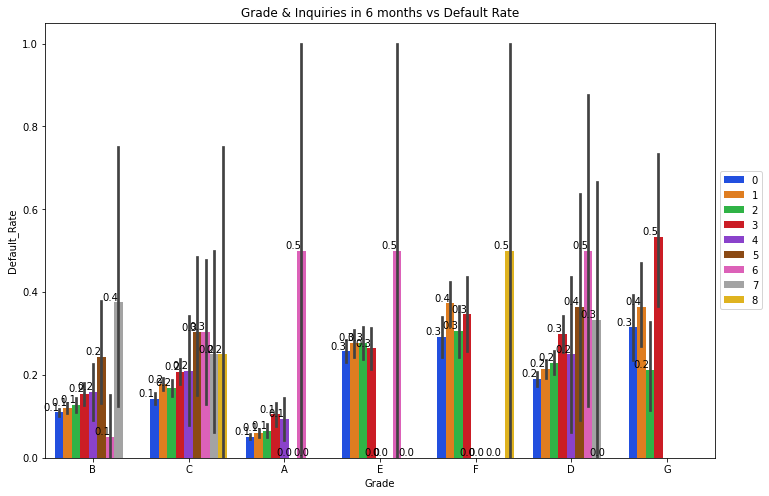

In [158]:
# Set the width and height of the figure
plt.figure(figsize=(12,8))

# Grade and Inquiries in 6 months Analysis using box plot and bar plot w.r.t Default Rate
bar_plot_bivariate(loan, hue = 'inq_last_6mths', x='grade', y='Default_Rate')
# Add label for x axis
plt.xlabel('Grade')
#plt.xticks(rotation = 45)

# Add title
plt.title('Grade & Inquiries in 6 months vs Default Rate')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### Observation:
+ The Default Rate is high for high number of inquiries

### Grade and Delinquicies in 2 years

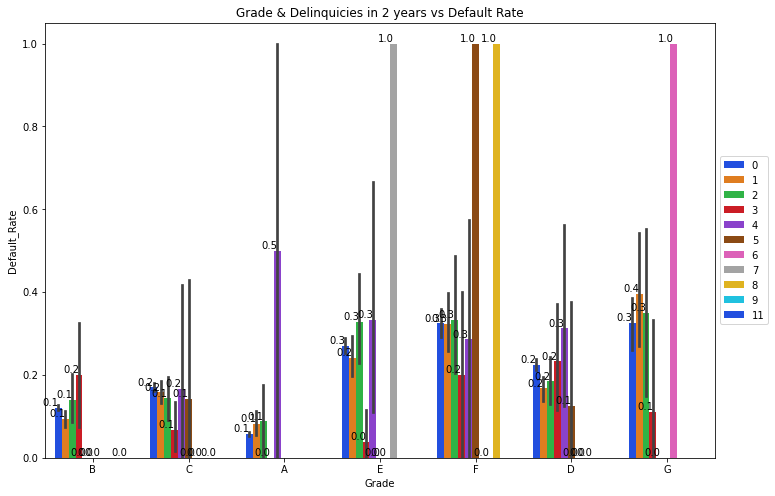

In [159]:
# grade and delinq_2yrs

# Set the width and height of the figure
plt.figure(figsize=(12,8))

# Grade and Inquiries in 6 months Analysis using box plot and bar plot w.r.t Default Rate
bar_plot_bivariate(loan, hue = 'delinq_2yrs', x='grade', y='Default_Rate')
# Add label for x axis
plt.xlabel('Grade')
#plt.xticks(rotation = 45)

# Add title
plt.title('Grade & Delinquicies in 2 years vs Default Rate')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### Observation:
+ The Default Rate is high for borrowers having past history of deliquincies

### Grade and Revolving Line Utilization Rate

Text(0.5, 1.0, 'Grade & Revolving Line Utilization Rate vs Default Rate')

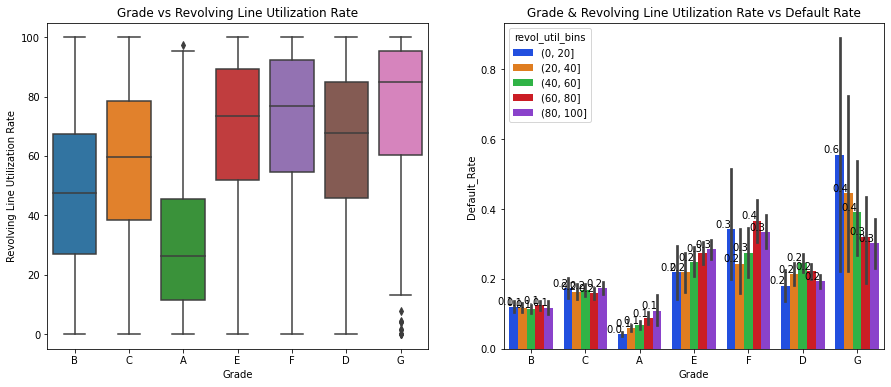

In [160]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Grade vs Revolving Line Utilization Rate Analysis using box plot and bar plot w.r.t Default Rate

plt.subplot(1,2,1)
box_plot(loan, x = 'grade', y='revol_util')
# Add label for x axis
plt.xlabel('Grade')
#plt.xticks(rotation = 45)

# Add label for y axis
plt.ylabel('Revolving Line Utilization Rate')
# Add title
plt.title('Grade vs Revolving Line Utilization Rate')


plt.subplot(1,2,2)
bar_plot_bivariate(loan, hue = 'revol_util_bins', x='grade', y='Default_Rate')
# Add label for x axis
plt.xlabel('Grade')
#plt.xticks(rotation = 45)

# Add title
plt.title('Grade & Revolving Line Utilization Rate vs Default Rate')

#### Observation:
+ The Default Rate is high for borrowers having high rate of revolving line utilisation

### Distribution plots

Text(0.5, 1.0, 'Loan Amount Distribution Plot')

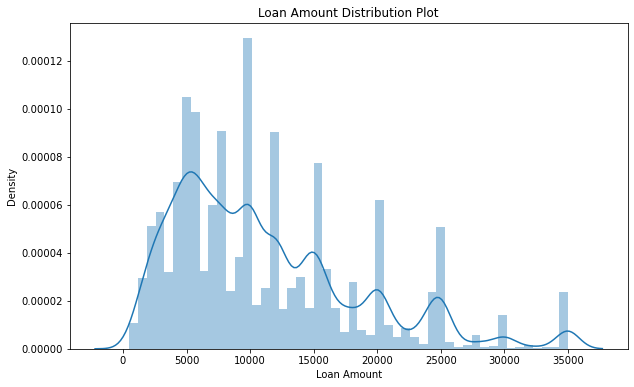

In [161]:
# Distribution plot for  loan_amnt
plt.figure(figsize=(10,6))

sns.distplot(loan['loan_amnt'])
# Add label for x axis
plt.xlabel('Loan Amount')
#plt.xticks(rotation = 45)

# Add title
plt.title('Loan Amount Distribution Plot')

#### Observation:
+ More number of loan amounts are in the range 2500-7500

Text(0.5, 1.0, 'Interest Rate Distribution Plot')

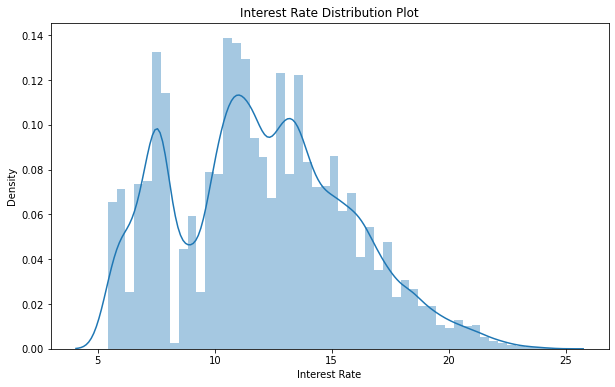

In [162]:
# Distribution plots
# int_rate
plt.figure(figsize=(10,6))

sns.distplot(loan['int_rate'])
# Add label for x axis
plt.xlabel('Interest Rate')
#plt.xticks(rotation = 45)

# Add title
plt.title('Interest Rate Distribution Plot')

#### Observation:
+ The interest rate is mostly in the range 10 - 15

Text(0.5, 1.0, 'Annual Income Distribution Plot')

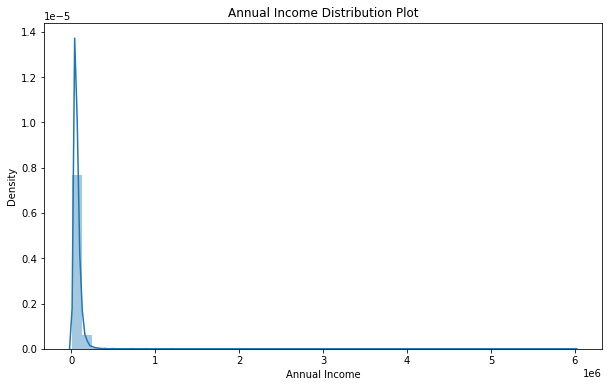

In [163]:
# Distribution plots
# annual_inc
plt.figure(figsize=(10,6))

sns.distplot(loan['annual_inc'])
# Add label for x axis
plt.xlabel('Annual Income')
#plt.xticks(rotation = 45)

# Add title
plt.title('Annual Income Distribution Plot')

#### Observation:
+ More borrowers are in the low annual income category

In [164]:
### Scatter Plots

Text(0.5, 1.0, 'Annual Income & Loan Amount')

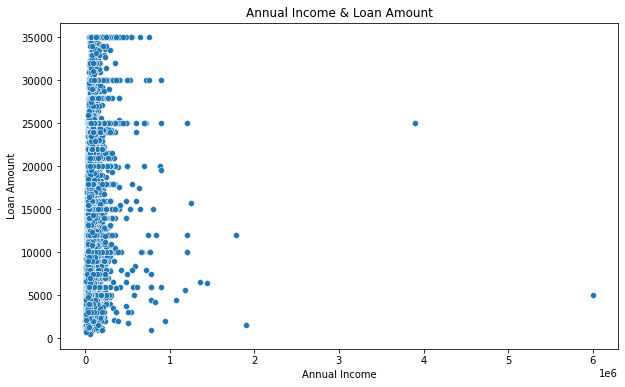

In [165]:
#scatterplots fpr Annual Income Vs Loan Amount
plt.figure(figsize=(10,6))

sns.scatterplot(loan['annual_inc'],loan['loan_amnt'])
# Add label for x axis
plt.xlabel('Annual Income')
#plt.xticks(rotation = 45)
# Add label for x axis
plt.ylabel('Loan Amount')
#plt.xticks(rotation = 45)
# Add title
plt.title('Annual Income & Loan Amount')

Text(0.5, 1.0, 'Interest Rate & Loan Amount')

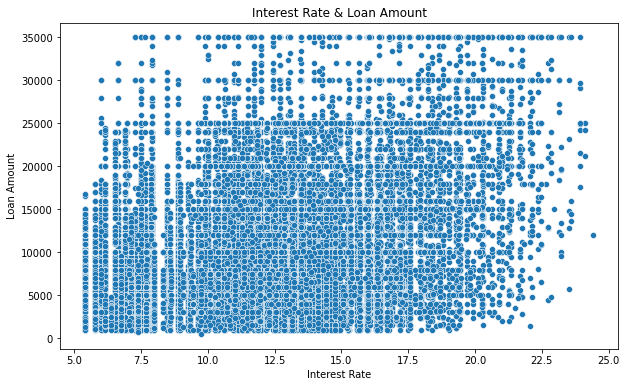

In [166]:
#scatterplots fpr Loan Amount Vs Interest Rate
plt.figure(figsize=(10,6))

sns.scatterplot(loan['int_rate'],loan['loan_amnt'])
# Add label for x axis
plt.xlabel('Interest Rate')
#plt.xticks(rotation = 45)
# Add label for x axis
plt.ylabel('Loan Amount')
#plt.xticks(rotation = 45)
# Add title
plt.title('Interest Rate & Loan Amount')

#### Observation:
+ Interst Rate and loan amounts are higly correlated

Text(0.5, 1.0, 'Revolving Line Utilisation Rate & Open Credit Lines')

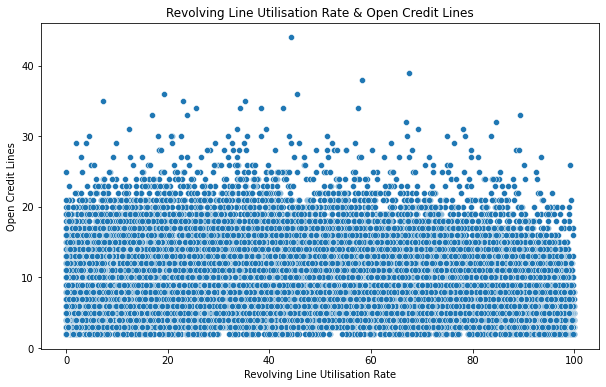

In [167]:
#scatterplots for revol_util Vs open_acc
plt.figure(figsize=(10,6))

sns.scatterplot(loan['revol_util'],loan['open_acc'])
# Add label for x axis
plt.xlabel('Revolving Line Utilisation Rate')
#plt.xticks(rotation = 45)
# Add label for x axis
plt.ylabel('Open Credit Lines')
#plt.xticks(rotation = 45)
# Add title
plt.title('Revolving Line Utilisation Rate & Open Credit Lines')

### Pair plots

<Figure size 1440x720 with 0 Axes>

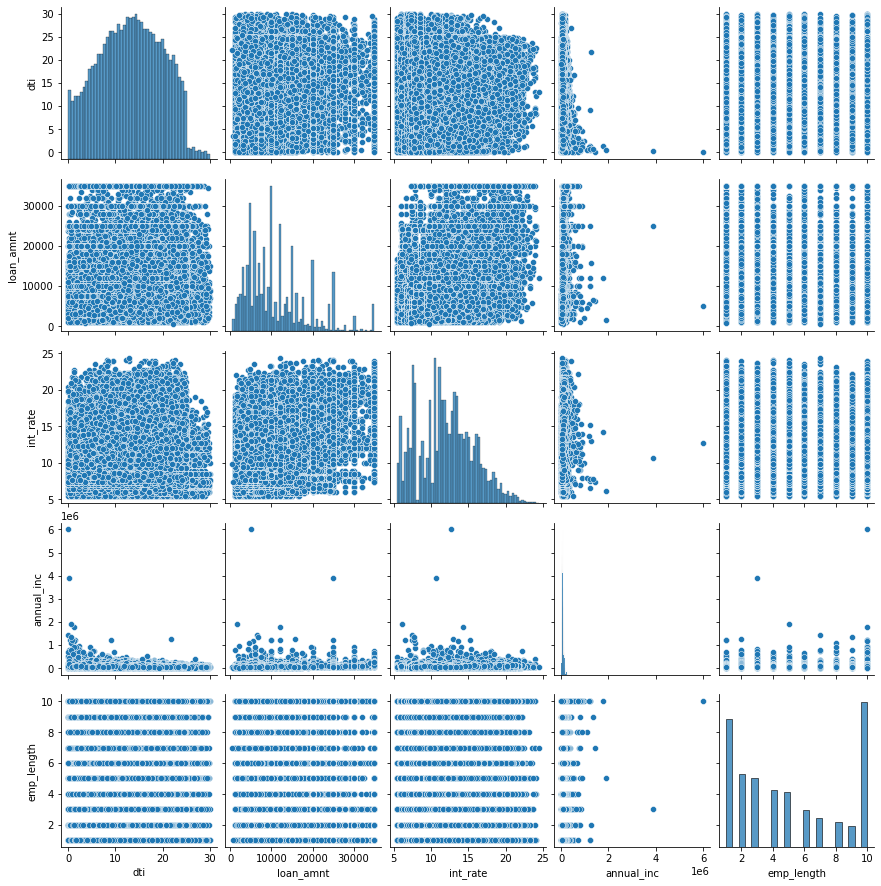

In [168]:
# pairplots
plt.figure(figsize=(20,10))

sns.pairplot(data = loan, vars=['dti','loan_amnt','int_rate', 'annual_inc','emp_length'])

#### Observation:
+ High correlation between 

+ loan amount and dti
+ loan amount and interest rate
+ dti and interest rate

<Figure size 1440x720 with 0 Axes>

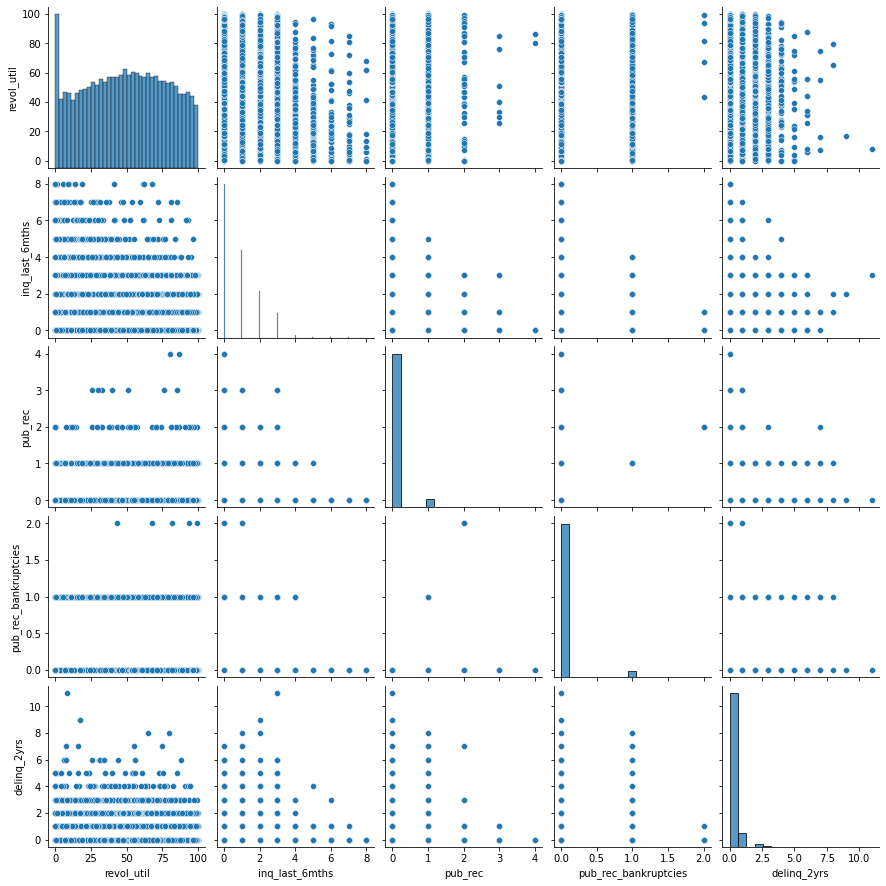

In [169]:
# pairplots
plt.figure(figsize=(20,10))

sns.pairplot(data = loan, vars=['revol_util', 'inq_last_6mths','pub_rec','pub_rec_bankruptcies','delinq_2yrs'])

### Heatmap

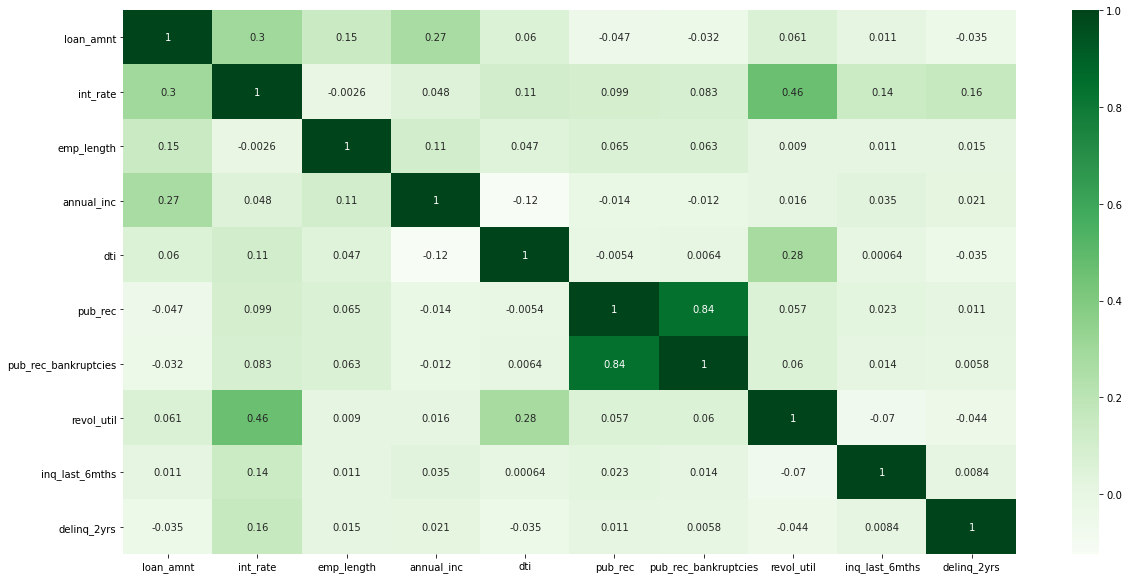

In [170]:
#Heatmap for correlation
# creating a subset of the loan df with only numerical columns
loan_corr  = loan[['loan_amnt', 'int_rate','emp_length','annual_inc','dti','pub_rec','pub_rec_bankruptcies','revol_util','inq_last_6mths','delinq_2yrs']]

plt.figure(figsize=(20,10))
sns.heatmap(loan_corr.corr(),cmap='Greens', annot=True)
plt.yticks(rotation = 0)
plt.show()

#### Observation:
+ pub_rec and pub_rec_bankruptcies are highly correlated

In [171]:
# Writing a helper method that will calculate the difference between max and min values of Default_Rate for each column
# and  populate a dictionary to get a clear picture of most important predictors

In [172]:
# dictionary
dict_column_DR_diff= {}

def diff_between_max_min_default_rate(column):
    df = loan.groupby(column).agg({'Default_Rate': ['mean']})
    # getting max and min vals
    maximum = sorted(df.iloc[0:].values)[-1]
    minimum = sorted(df.iloc[0:].values)[0]
    # calculating diff
    diff_val = round(maximum[0] - minimum[0] ,2)
    # populating dictionary
    dict_column_DR_diff[column]=diff_val
    

In [173]:
# calculating and storing diffs for all the categorical columns
diff_between_max_min_default_rate('term') 
diff_between_max_min_default_rate('grade')
diff_between_max_min_default_rate('sub_grade') 
diff_between_max_min_default_rate('home_ownership')
diff_between_max_min_default_rate('verification_status') 
diff_between_max_min_default_rate('purpose') 
diff_between_max_min_default_rate('issue_d_month') 
diff_between_max_min_default_rate('addr_state') 

In [174]:
# calculating and storing diffs for all the categorical columns
diff_between_max_min_default_rate('int_rate_bins') 
diff_between_max_min_default_rate('loan_amnt_bins') 
diff_between_max_min_default_rate('emp_length')
diff_between_max_min_default_rate('annual_inc_bins') 
diff_between_max_min_default_rate('dti_bins')
diff_between_max_min_default_rate('pub_rec') 
diff_between_max_min_default_rate('inq_last_6mths') 
diff_between_max_min_default_rate('pub_rec_bankruptcies') 
diff_between_max_min_default_rate('open_acc') 
diff_between_max_min_default_rate('revol_bal_bins') 
diff_between_max_min_default_rate('revol_util_bins') 
diff_between_max_min_default_rate('delinq_2yrs')
#diff_between_max_min_default_rate('total_acc')


In [175]:
dr_diff = pd.DataFrame(list(dict_column_DR_diff.items())) 
dr_diff

,0,1
0,term,0.14
1,grade,0.28
2,sub_grade,0.45
3,home_ownership,0.05
4,verification_status,0.04
5,purpose,0.17
6,issue_d_month,0.04
7,addr_state,0.22
8,int_rate_bins,0.32
9,loan_amnt_bins,0.09


In [176]:
print ("{:<25} {:<25}".format('COLUMN','DefaultRate_Diff'))
print()

for k, v in dict_column_DR_diff.items():
    print ("{:<25} {:<25}".format(k, v))

COLUMN                    DefaultRate_Diff         

term                      0.14                     
grade                     0.28                     
sub_grade                 0.45                     
home_ownership            0.05                     
verification_status       0.04                     
purpose                   0.17                     
issue_d_month             0.04                     
addr_state                0.22                     
int_rate_bins             0.32                     
loan_amnt_bins            0.09                     
emp_length                0.03                     
annual_inc_bins           0.07                     
dti_bins                  0.04                     
pub_rec                   0.22                     
inq_last_6mths            0.16                     
pub_rec_bankruptcies      0.26                     
open_acc                  1.0                      
revol_bal_bins            0.04                     
revol_util_

### Final Thoughts

#### Major drivers to consider for loan default prediction:

    1.  Term
    2.  Grade & Subgrade
    3.  Purpose
    4.  Interest Rate
    5.  Derogatory Public Records
    6.  No. of Bankruptcies
    7.  Delinquincies in past 2 years
    8.  Inquiries in last 6 months
    9.  Revolving Line Utilisation
    10. Loan amount
    11. Annual Income
    12. Address State

#### Term:
+ Default Rate is higher for 60 months term

#### Grade & Subgrade:
+ Default Rate is higher for Grades E , F and G
+ Default Rate is higher for all the subgrades of E , F , G and subgrade D5

#### Purpose:
+ Default Rate is higher small business, renewable energy and educational

#### Interest Rate:
+ Default Rate is higher for higher interest rates

#### Derogatory Public Records:
+ Default Rate is higher for borrowers having derogatory records

#### No. of Bankruptcies:
+ Default Rate is higher for borrowers having bankruptcy records

#### Delinquincies in past 2 years:
+ The Default Rate is higher when borrowers have more no. of delinquencies

#### Inquiries in last 6 months:
+ Default Rate is higher for more number of inquiries

#### Revolving Line Utilisation
+ The Default Rate is higher when people have higher Revolving line utilization rate

#### Loan amount
+ Default Rate is higher for higher loan amount

#### Annual Income
+ Default Rate is higher for borrowers with lower annual income

#### Address State
+ Default Rate is higher for few states like NV, AK and TN